In [1]:
import json
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
# pd.set_option('display.width', )
pd.set_option('display.max_colwidth', None)

# set matplotlib style
# plt.style.use('seaborn-whitegrid')
# set font styles and size
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 12

# set seaborn style
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)

# set seaborn color palette
sns.set_palette('colorblind')

In [69]:
name_map = {
    'Llama-2-7b-hf': 'Llama-2 (base)',
    # 'llama_2_7b_hf_mono_merged': 'mono (en)',
    'llama_2_7b_hf_ml1_merged': 'Llama-2 Mono',
    'llama_2_7b_hf_ml2_merged': 'Llama-2 ML2',
    'llama_2_7b_hf_ml3_merged': 'Llama-2 ML3',
    'llama_2_7b_hf_ml4_merged': 'Llama-2 ML4',
    'llama_2_7b_hf_ml5_merged': 'Llama-2 ML5',
    # 'llama_2_7b_hf_en_merged': 'ML6/en',
    'llama_2_7b_hf_es_merged': 'Llama-2 ML6/es',
    'llama_2_7b_hf_ru_merged': 'Llama-2 ML6/ru',
    'llama_2_7b_hf_de_merged': 'Llama-2 ML6/de',
    'llama_2_7b_hf_zh_merged': 'Llama-2 ML6/zh',
    'llama_2_7b_hf_fr_merged': 'Llama-2 ML6/fr',
    'llama_2_7b_hf_ca_merged': 'Llama-2 ML6/ca',
    'llama_2_7b_hf_mt_es_merged': 'Llama-2 MT ML6/es', # translated training data
    'llama_2_7b_hf_mt_ru_merged': 'Llama-2 MT ML6/ru', # translated training data
    'llama_2_7b_hf_mt_de_merged': 'Llama-2 MT ML6/de', # translated training data
    'llama_2_7b_hf_mt_zh_merged': 'Llama-2 MT ML6/zh', # translated training data
    'llama_2_7b_hf_mtol_de_merged': 'Llama-2 MTOL ML6/de', # translated training data
    'llama_2_7b_hf_mtol_ca_merged': 'Llama-2 MTOL ML6/ca', # translated training data
    'llama_2_7b_hf_mt_ml2_merged': 'Llama-2 MT ML2', # translated training data
    'llama_2_7b_hf_mt_ml3_merged': 'Llama-2 MT ML3', # translated training data
    'llama_2_7b_hf_mt_ml4_merged': 'Llama-2 MT ML4', # translated training data
    'llama_2_7b_hf_mt_ml5_merged': 'Llama-2 MT ML5', # translated training data
    'llama_2_7b_hf_mt_ml6_merged': 'Llama-2 MT ML6', # translated training data
    'llama_2_7b_hf_guanaco_merged': 'Llama-2 Guanaco',
    'falcon_7b_ml1_merged': 'Falcon Mono',
    'falcon_7b_ml2_merged': 'Falcon ML2',
    'falcon_7b_ml3_merged': 'Falcon ML3',
    'falcon_7b_ml4_merged': 'Falcon ML4',
    'falcon_7b_ml5_merged': 'Falcon ML5',
    'falcon_7b_es_merged': 'Falcon ML6/es',
    'falcon_7b_ru_merged': 'Falcon ML6/ru',
    'falcon_7b_de_merged': 'Falcon ML6/de',
    'falcon_7b_zh_merged': 'Falcon ML6/zh',
    'falcon_7b_fr_merged': 'Falcon ML6/fr',
    'falcon_7b_ca_merged': 'Falcon ML6/ca',
    'falcon_7b_guanaco_merged': 'Falcon Guanaco',
    'llama_2_70b_hf_mt_ml1_merged': 'Llama-2 70B Mono', 
    'llama_2_70b_hf_mt_ml2_merged': 'Llama-2 70B MT ML2', # translated training data
    'llama_2_70b_hf_mt_ml3_merged': 'Llama-2 70B MT ML3', # translated training data
    'llama_2_70b_hf_mt_ml4_merged': 'Llama-2 70B MT ML4', # translated training data
    'llama_2_70b_hf_mt_ml5_merged': 'Llama-2 70B MT ML5', # translated training data
    'llama_2_70b_hf_mt_ml6_merged': 'Llama-2 70B MT ML6', # translated training data
    'llama_2_70b_hf_guanaco_merged': 'Llama-2 70B Guanaco', # translated training data
    'alpaca_eval_instructions_en': 'en',
    'alpaca_eval_instructions_es': 'es',
    'alpaca_eval_instructions_ru': 'ru',
    'alpaca_eval_instructions_de': 'de',
    'alpaca_eval_instructions_zh': 'zh',
    'alpaca_eval_instructions_fr': 'fr',
    'alpaca_eval_instructions_ca': 'ca',
    'alpaca_eval_instructions_sv': 'sv*',
    'alpaca_eval_instructions_bg': 'bg*',
    'alpaca_eval_instructions_no': 'no*',
    'alpaca_eval_instructions_da': 'da*',
    'alpaca_eval_instructions_is': 'is**',
    'alpaca_eval_instructions_hi': 'hi**',
    'alpaca_eval_instructions_el': 'el**',
    'flores_devtest_en_es': 'es',
    'flores_devtest_en_ru': 'ru',
    'flores_devtest_en_de': 'de',
    'flores_devtest_en_zh': 'zh',
    'flores_devtest_en_fr': 'fr',
    'flores_devtest_en_ca': 'ca',
    'flores_devtest_en_sv': 'sv*',
    'flores_devtest_en_bg': 'bg*',
    'flores_devtest_en_no': 'no*',
    'flores_devtest_en_da': 'da*',
    'flores_devtest_en_is': 'is**',
    'flores_devtest_en_hi': 'hi**',
    'flores_devtest_en_el': 'el**',
    'xcsr_dev_en_en': 'en',
    'xcsr_dev_en_es': 'es',
    'xcsr_dev_en_ru': 'ru',
    'xcsr_dev_en_de': 'de',
    'xcsr_dev_en_fr': 'fr',
    'xcsr_dev_en_hi': 'hi**',
}

training_langs = {
    'Mono': ['en'],
    'ML2': ['en', 'es'],
    'ML3': ['en', 'es', 'ru'],
    'ML4': ['en', 'es', 'ru', 'de'],
    'ML5': ['en', 'es', 'ru', 'de', 'zh'],
    'ML6': ['en', 'es', 'ru', 'de', 'zh', 'fr'],
    'ML6/de': ['en', 'es', 'ru', 'zh', 'fr', 'ca'],
    'ML6/fr': ['en', 'es', 'ru', 'de', 'zh', 'ca'],
    'ML6/zh': ['en', 'es', 'ru', 'de', 'fr', 'ca'],
    'ML6/es': ['en', 'ru', 'de', 'zh', 'fr', 'ca'],
    'ML6/ru': ['en', 'es', 'de', 'zh', 'fr', 'ca'],
    'ML6/ca': ['en', 'es', 'ru', 'de', 'zh', 'fr'],
    'Guanaco': ['es', 'en', 'ru', 'de', 'zh', 'fr', 'ca', 'th', 'pt', 'it', 'uk', 'eu', 'jp', 'pl', 'zh', 'vi', 'hu', 'gn', 'da', 'tr', 'nl', 'gl', 'mt', 'ar', 'ms', 'sc', 'nn', 'ko', 'ht', 'ar', 'id', 'ar', 'wo', 'uz', 'lv', 'jv', 'fi', 'tk', 'tg', 'sv', 'so', 'sl', 'sk', 'no', 'kk', 'ga', 'cz'],
}

def load_json(file):
    with open(file, "r", encoding='utf8') as f:
        return json.load(f)

def parse_filename(file):
    """
    data/outputs/llama_2_7b_hf_en_merged/alpaca_eval_instructions_ru-none-guanaco_prompt-s0-k50-p0.9-t0.8-b8.eval
    """
    # get test set and context, allowing for no context
    model_name = Path(file).parent.name
    parts = Path(file).stem.split('-')

    test_set = parts[0]
    context = parts[1]
    prompt = parts[2]
    seed = int(parts[3][1:])
    top_k = int(parts[4][1:])
    top_p = float(parts[5][1:])
    temp = float(parts[6][1:])
    bs = int(parts[7][1:])

    has_translation, n_eval_items, data_seed, api_seed, eval_src, eval_tgt = None, None, None, None, None, None
    if len(parts) > 8:

        # with_en-l300-ds42-as42-source_en-system_en
        has_translation = parts[8] == 'with_en'
        n_eval_items = int(parts[-5][1:])
        data_seed = int(parts[-4][2:])
        api_seed = int(parts[-3][2:])
        eval_src = parts[-2]
        eval_tgt = parts[-1]

    return model_name, test_set, prompt, seed, has_translation, n_eval_items, data_seed, api_seed, eval_src, eval_tgt

# sort models given the order in name_map
ordered_model_names = [v for k, v in name_map.items() if k.startswith('llama') or k.startswith('falcon')]
print(ordered_model_names)
ordered_alpaca_test_sets = [v for k, v in name_map.items() if k.startswith('alpaca')]
print(ordered_alpaca_test_sets)
ordered_flores_test_sets = [v for k, v in name_map.items() if k.startswith('flores')]
print(ordered_flores_test_sets)
ordered_xcsr_test_sets = [v for k, v in name_map.items() if k.startswith('xcsr')]
print(ordered_xcsr_test_sets)

def apply_sort(df, ordered_test_sets, ordered_model_names=ordered_model_names):

    df['model_name'] = pd.Categorical(df['model_name'], ordered_model_names)
    df['test_set'] = pd.Categorical(df['test_set'], ordered_test_sets)

    if 'seed' in df.columns:
        df = df.sort_values(by=['model_name', 'test_set', 'seed'])
    else:
        df = df.sort_values(by=['model_name', 'test_set'])

    # Convert the columns back to their original data types
    df['model_name'] = df['model_name'].astype(str)
    df['test_set'] = df['test_set'].astype(str)
        
    df = df.reset_index(drop=True)

    df.info()
    
    return df


['Llama-2 Mono', 'Llama-2 ML2', 'Llama-2 ML3', 'Llama-2 ML4', 'Llama-2 ML5', 'Llama-2 ML6/es', 'Llama-2 ML6/ru', 'Llama-2 ML6/de', 'Llama-2 ML6/zh', 'Llama-2 ML6/fr', 'Llama-2 ML6/ca', 'Llama-2 MT ML6/es', 'Llama-2 MT ML6/ru', 'Llama-2 MT ML6/de', 'Llama-2 MT ML6/zh', 'Llama-2 MTOL ML6/de', 'Llama-2 MTOL ML6/ca', 'Llama-2 MT ML2', 'Llama-2 MT ML3', 'Llama-2 MT ML4', 'Llama-2 MT ML5', 'Llama-2 MT ML6', 'Llama-2 Guanaco', 'Falcon Mono', 'Falcon ML2', 'Falcon ML3', 'Falcon ML4', 'Falcon ML5', 'Falcon ML6/es', 'Falcon ML6/ru', 'Falcon ML6/de', 'Falcon ML6/zh', 'Falcon ML6/fr', 'Falcon ML6/ca', 'Falcon Guanaco', 'Llama-2 70B Mono', 'Llama-2 70B MT ML2', 'Llama-2 70B MT ML3', 'Llama-2 70B MT ML4', 'Llama-2 70B MT ML5', 'Llama-2 70B MT ML6', 'Llama-2 70B Guanaco']
['en', 'es', 'ru', 'de', 'zh', 'fr', 'ca', 'sv*', 'bg*', 'no*', 'da*', 'is**', 'hi**', 'el**']
['es', 'ru', 'de', 'zh', 'fr', 'ca', 'sv*', 'bg*', 'no*', 'da*', 'is**', 'hi**', 'el**']
['en', 'es', 'ru', 'de', 'fr', 'hi**']


In [70]:

def get_results(results_dir):
    """
    Collect all eval files in results_dir and parse them into a dataframe
    """
    dfs = []
    for eval_file in Path(results_dir).glob('*/*.eval'):
        # print(eval_file)
        df = pd.read_csv(eval_file, index_col=None)
        model_name, test_set, prompt, seed, has_translation, n_eval_items, data_seed, api_seed, eval_src, eval_tgt = parse_filename(eval_file)
        df['model_name'] = model_name
        df['test_set'] = test_set
        df['context'] = prompt
        df['seed'] = seed
        dfs.append(df)
        
        # # get generation args too
        # try:
        #     hp_file = eval_file.with_suffix(".json")
        #     hps = load_json(hp_file)
        #     eval_dict.update(hps)
        # except:
        #     pass
    
    df = pd.concat(dfs, axis=0, ignore_index=True)

    df.replace({'model_name': name_map, 'test_set': name_map}, inplace=True)

    # add column for training languages
    df['training_langs'] = df.apply(lambda x: training_langs[x['model_name'].split()[-1]], axis=1)

    # move input_file, model_name and seed to front
    cols = df.columns.tolist()
    cols.insert(0, cols.pop(cols.index('model_name')))
    cols.insert(1, cols.pop(cols.index('test_set')))
    cols.insert(2, cols.pop(cols.index('seed')))
    cols.insert(3, cols.pop(cols.index('training_langs')))
    df = df.reindex(columns=cols)

    df.info()
    
    return df

df = get_results('data/outputs')
print(len(df))
print(df.columns)
df = apply_sort(df, ordered_test_sets=ordered_alpaca_test_sets)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   model_name      1764 non-null   object 
 1   test_set        1764 non-null   object 
 2   seed            1764 non-null   int64  
 3   training_langs  1764 non-null   object 
 4   lang_match      1764 non-null   float64
 5   tgt_lang        1764 non-null   float64
 6   ppl             1344 non-null   float64
 7   file            1764 non-null   object 
 8   context         1764 non-null   object 
 9   ppl_model       846 non-null    object 
 10  n               1509 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 151.7+ KB
1764
Index(['model_name', 'test_set', 'seed', 'training_langs', 'lang_match',
       'tgt_lang', 'ppl', 'file', 'context', 'ppl_model', 'n'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data c

,model_name,test_set,seed,training_langs,lang_match,tgt_lang,ppl,file,context,ppl_model,n
0,Llama-2 Mono,en,0,[en],0.944,0.964,14.927,data/outputs/llama_2_7b_hf_ml1_merged/alpaca_eval_instructions_en-none-guanaco_prompt-s0-k50-p0.9-t0.8-b8.jsonl,guanaco_prompt,NaN,NaN
1,Llama-2 Mono,en,42,[en],0.933,0.954,20673.208,data/outputs/llama_2_7b_hf_ml1_merged/alpaca_eval_instructions_en-none-guanaco_prompt-s42-k50-p0.9-t0.8-b8.jsonl,guanaco_prompt,NaN,NaN
2,Llama-2 Mono,en,723,[en],0.938,0.960,18.525,data/outputs/llama_2_7b_hf_ml1_merged/alpaca_eval_instructions_en-none-guanaco_prompt-s723-k50-p0.9-t0.8-b8.jsonl,guanaco_prompt,NaN,NaN
3,Llama-2 Mono,es,0,[en],0.436,0.450,20.300,data/outputs/llama_2_7b_hf_ml1_merged/alpaca_eval_instructions_es-none-guanaco_prompt-s0-k50-p0.9-t0.8-b8.jsonl,guanaco_prompt,ai-forever/mGPT,805.0
4,Llama-2 Mono,es,42,[en],0.451,0.467,43.756,data/outputs/llama_2_7b_hf_ml1_merged/alpaca_eval_instructions_es-none-guanaco_prompt-s42-k50-p0.9-t0.8-b8.jsonl,guanaco_prompt,ai-forever/mGPT,805.0


In [71]:
def get_results_overview(df, cols=['model_name', 'test_set', 'seed']):
    for col in cols:
        print(f'*** {col} ***')
        print(df[col].value_counts())
        print()

get_results_overview(df)

*** model_name ***
Llama-2 Mono           42
Falcon ML6/zh          42
Falcon Mono            42
Falcon ML2             42
Falcon ML3             42
Falcon ML4             42
Falcon ML5             42
Falcon ML6/es          42
Falcon ML6/ru          42
Falcon ML6/de          42
Falcon ML6/fr          42
Llama-2 ML2            42
Falcon ML6/ca          42
Falcon Guanaco         42
Llama-2 70B Mono       42
Llama-2 70B MT ML2     42
Llama-2 70B MT ML3     42
Llama-2 70B MT ML4     42
Llama-2 70B MT ML5     42
Llama-2 70B MT ML6     42
Llama-2 Guanaco        42
Llama-2 MT ML6         42
Llama-2 MT ML5         42
Llama-2 MT ML4         42
Llama-2 ML3            42
Llama-2 ML4            42
Llama-2 ML5            42
Llama-2 ML6/es         42
Llama-2 ML6/ru         42
Llama-2 ML6/de         42
Llama-2 ML6/zh         42
Llama-2 ML6/fr         42
Llama-2 ML6/ca         42
Llama-2 MT ML6/es      42
Llama-2 MT ML6/ru      42
Llama-2 MT ML6/de      42
Llama-2 MT ML6/zh      42
Llama-2 MTOL ML6/de

In [72]:
def get_agg_df(
        df, 
        group_cols=['model_name', 'test_set'], 
        agg_ops={
            'lang_match': [np.mean, np.std], 
            'tgt_lang': [np.mean, np.std], 
            'ppl': [np.mean, np.std],
            }
        ):
    """
    Aggregates the results of the different strategies.
    If use_macro is True, then the macro-averaged results are used, otherwise the micro-averaged results are used.
    """
    df = df.groupby(group_cols, as_index=True).agg(agg_ops)
    # df = df.reindex(['0-shot', '1-shot', 'Mem-4', 'Mem-8', 'L2M'])
    # df[df.select_dtypes(include=['number']).columns] *= 100
    df = df.round(2)
    return df

def styled_df(df, color):
    return df.style.background_gradient(axis=0, text_color_threshold=0, cmap=sns.light_palette(color, as_cmap=True)).highlight_max(axis=0, props='font-weight:bold;').format(precision=2)

# unset multi-index
# agg_df = get_agg_df(df).reset_index()
# join levels of multi-index columns
# agg_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in agg_df.columns]
# styled_df(agg_df, 'seagreen')

data/plots/llama2_7b_lang_match_incremental_ml_wide.png saved.


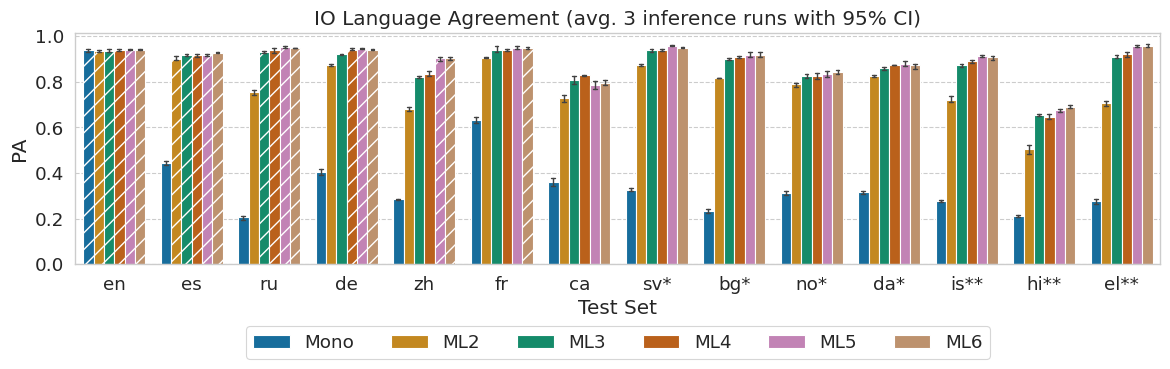

In [77]:
# plot bar plots of lang_match
def make_basic_barplot_long(df, title=None, save_path=None):
    
    # Get the unique values for 'test_set' and 'model_name'
    test_sets = [l for l in ordered_alpaca_test_sets if l in df['test_set'].unique()]
    model_names = df['model_name'].unique()

    # number of bars to plot with hue
    expected_num_bars = len(test_sets) * len(model_names)

    fig, ax = plt.subplots(figsize=(4, expected_num_bars//4))

    sns.barplot(data=df,
                x='lang_match', y='test_set', 
                hue='model_name', 
                errorbar=("ci", 95), capsize=0.3,
                err_kws={"linewidth": 1.0},
                alpha=1.0,
                order=test_sets,
                hue_order=model_names,
                orient='h',
                ax=ax)

    # remove bars from sorted that correspond to the legend
    bars = [patch for patch in ax.patches if patch.xy != (0, 0)]

    sorted_bars = sorted(bars, key=lambda bar: bar.get_y(), reverse=False)
    
    # Create a dictionary to map each bar to its 'test_set' and 'model_name'
    bar_info = {}
    for i, test_set in enumerate(test_sets):
        for j, model_name in enumerate(model_names):
    #         # The index of the bar in the patches list
            index = i * len(model_names) + j
            bar_info[sorted_bars[index]] = {'test_set': test_set, 'model_name': model_name}

    # Loop over the bars and add a text label as a marker
    for i, (bar, info) in enumerate(bar_info.items()):
        if info['test_set'] in training_langs[info['model_name'].split()[-1]]:
            bar.set_hatch('//')
        else:
            bar.set_hatch('')

    if title:
        ax.set_title(title)

    ax.set_xlabel('Language Match')
    ax.set_ylabel('Test Set')

    # add vertical gridlines
    ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.4)

    # legend at bottom
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
        print(f'{save_path} saved.')

    return

def make_basic_barplot_wide(df, title=None, save_path=None):
    
    # Get the unique values for 'test_set' and 'model_name'
    test_sets = [l for l in ordered_alpaca_test_sets if l in df['test_set'].unique()]
    model_names = df['model_name'].unique()

    # number of bars to plot with hue
    expected_num_bars = len(test_sets) * len(model_names)

    fig, ax = plt.subplots(figsize=(len(test_sets), 3))

    sns.barplot(data=df,
                x='test_set', y='lang_match', 
                hue='model_name', 
                errorbar=("ci", 95), capsize=0.3,
                err_kws={"linewidth": 1.0},
                alpha=1.0,
                order=test_sets,
                hue_order=model_names,
                ax=ax)

    # remove bars from sorted that correspond to the legend
    bars = [patch for patch in ax.patches if patch.xy != (0, 0)]

    sorted_bars = sorted(bars, key=lambda bar: bar.get_x(), reverse=False)
    
    # Create a dictionary to map each bar to its 'test_set' and 'model_name'
    bar_info = {}
    for i, test_set in enumerate(test_sets):
        for j, model_name in enumerate(model_names):
    #         # The index of the bar in the patches list
            index = i * len(model_names) + j
            bar_info[sorted_bars[index]] = {'test_set': test_set, 'model_name': model_name}

    # Loop over the bars and add a text label as a marker
    for i, (bar, info) in enumerate(bar_info.items()):
        if info['test_set'] in training_langs[info['model_name'].split()[-1]]:
            bar.set_hatch('//')
        else:
            bar.set_hatch('')

    if title:
        ax.set_title(title)

    ax.set_xlabel('Test Set')
    ax.set_ylabel('PA')

    # add horizontal gridlines
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.4)

    # legend at bottom
    if len(test_sets) >= 6:
        ncols = len(model_names)
        y_offset = -0.45
    else:
        ncols = 3
        y_offset = -0.55
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, y_offset), ncol=ncols)

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
        print(f'{save_path} saved.')

    return

# plot Llama-2 models with incremental multilingual training
sdf = df[df['model_name'].isin(['Llama-2 Mono', 'Llama-2 ML2', 'Llama-2 ML3', 'Llama-2 ML4', 'Llama-2 ML5', 'Llama-2 ML6/ca'])]
sdf = sdf[sdf['test_set'].isin(ordered_alpaca_test_sets)]
# sdf = sdf[sdf['test_set'].isin(['sv', 'da', 'no', 'bg', 'is', 'hi', 'el'])]
sdf['model_name'] = sdf['model_name'].str.replace('Llama-2 ', '').str.replace('/ca', '')

make_basic_barplot_wide(
    sdf, 
    title='IO Language Agreement (avg. 3 inference runs with 95% CI)', 
    save_path='data/plots/llama2_7b_lang_match_incremental_ml_wide.png')

# make_basic_barplot_long(
#     sdf, 
#     title='On-target performance (avg. 3 inference runs with 95% CI)', 
#     save_path='data/plots/llama2_7b_lang_match_incremental_ml_long.png')



data/plots/llama2_7b_lang_match_incremental_mt_ml_wide.png saved.


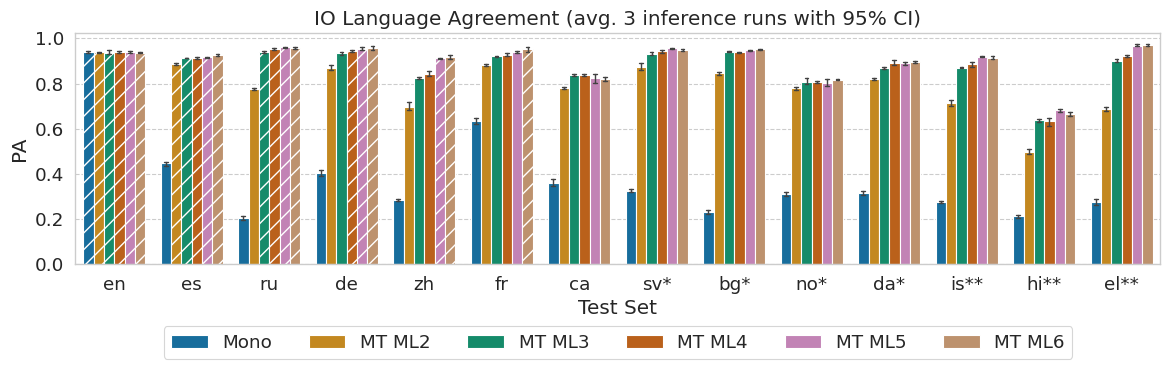

In [78]:
# plot Llama-2 models with incremental MT multilingual training
sdf = df[df['model_name'].isin(['Llama-2 Mono', 'Llama-2 MT ML2', 'Llama-2 MT ML3', 'Llama-2 MT ML4', 'Llama-2 MT ML5', 'Llama-2 MT ML6'])]
sdf = sdf[sdf['test_set'].isin(ordered_alpaca_test_sets)]
sdf['model_name'] = sdf['model_name'].str.replace('Llama-2 ', '')

make_basic_barplot_wide(
    sdf, 
    title='IO Language Agreement (avg. 3 inference runs with 95% CI)', 
    save_path='data/plots/llama2_7b_lang_match_incremental_mt_ml_wide.png')

data/plots/llama2_70b_lang_match_incremental_mt_ml_wide.png saved.


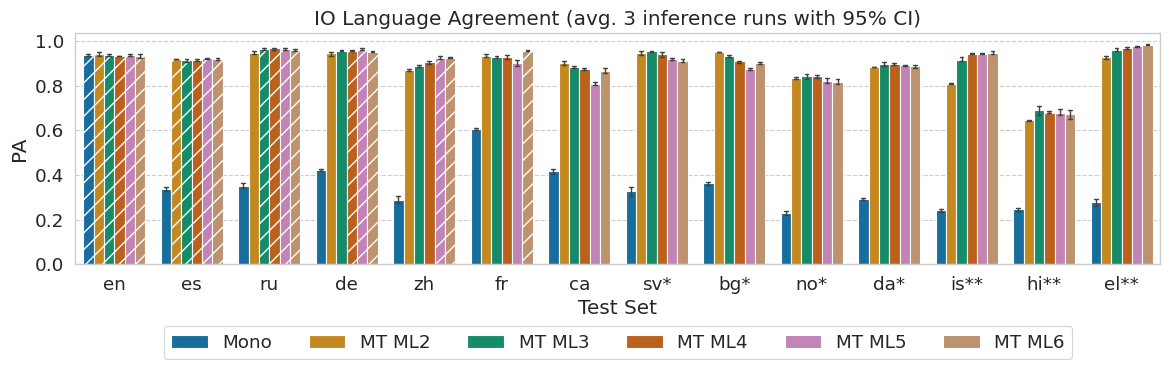

In [79]:
# plot Llama-2 70B models with incremental mt multilingual training

sdf = df[df['model_name'].isin(['Llama-2 70B Mono', 'Llama-2 70B MT ML2', 'Llama-2 70B MT ML3', 'Llama-2 70B MT ML4', 'Llama-2 70B MT ML5', 'Llama-2 70B MT ML6'])]
sdf = sdf[sdf['test_set'].isin(ordered_alpaca_test_sets)]
sdf['model_name'] = sdf['model_name'].str.replace('Llama-2 70B ', '')
make_basic_barplot_wide(
    sdf, 
    title='IO Language Agreement (avg. 3 inference runs with 95% CI)', 
    save_path='data/plots/llama2_70b_lang_match_incremental_mt_ml_wide.png'
    )

data/plots/llama2_7b_lang_match_loo_wide.png saved.


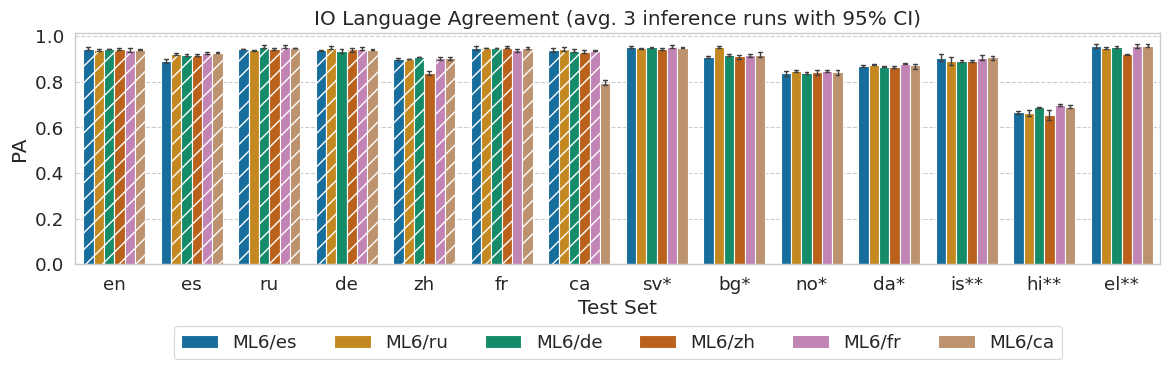

In [80]:
# get only Llama-2 models with incremental multilingual training
# en, es, ru, de, zh, fr
sdf = df[df['model_name'].isin(['Llama-2 ML6/es', 'Llama-2 ML6/ru', 'Llama-2 ML6/de', 'Llama-2 ML6/zh', 'Llama-2 ML6/fr', 'Llama-2 ML6/ca'])]
sdf = sdf[sdf['test_set'].isin(ordered_alpaca_test_sets)]
sdf['model_name'] = sdf['model_name'].str.replace('Llama-2 ', '')
make_basic_barplot_wide(
    sdf, 
    title='IO Language Agreement (avg. 3 inference runs with 95% CI)', 
    save_path='data/plots/llama2_7b_lang_match_loo_wide.png')

(36, 8)


data/plots/llama2_7b_lang_match_heatmap_loo.png saved.


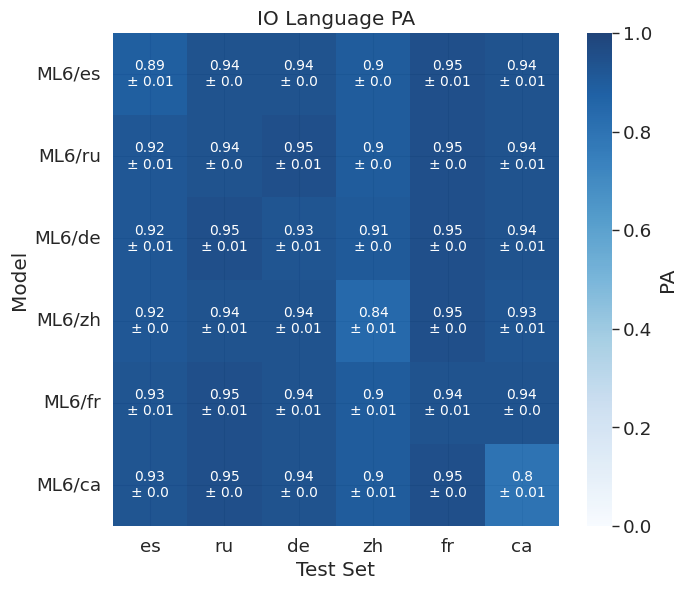

In [81]:
from matplotlib.patches import Rectangle

def make_basic_heatmap(df, metric, include_std=False, title=None, save_path=None, strip_from_model_name=None, include_hatches=False):
        
    print(df.shape)
    fig, ax = plt.subplots(figsize=(df.shape[0]*0.2, df.shape[1]*0.8))
    
    heatmap_mean = df.pivot_table(index='model_name', columns='test_set', values=f'{metric}_mean', sort=False)
    heatmap_std = df.pivot_table(index='model_name', columns='test_set', values=f'{metric}_std', sort=False)

    # sort by order in name_map
    heatmap_mean = heatmap_mean.reindex([n for n in ordered_model_names if n in heatmap_mean.index])
    heatmap_std = heatmap_std.reindex([n for n in ordered_model_names if n in heatmap_std.index])

    # sort columns by order in ordered_test_sets
    heatmap_mean = heatmap_mean.reindex(columns=[l for l in ordered_alpaca_test_sets if l in heatmap_mean.columns])
    heatmap_std = heatmap_std.reindex(columns=[l for l in ordered_alpaca_test_sets if l in heatmap_std.columns])

    if strip_from_model_name is not None:
        for segment in strip_from_model_name:
            heatmap_mean.index = heatmap_mean.index.str.replace(segment, '')
            heatmap_std.index = heatmap_std.index.str.replace(segment, '')

    if include_std:
        annotations = heatmap_mean.round(2).astype(str) + "\n± " + heatmap_std.round(2).astype(str)
    else:
        annotations = heatmap_std.round(2).astype(str)

    ax = sns.heatmap(
        heatmap_mean, annot=annotations, fmt='', 
        cmap="Blues", alpha=0.9, cbar=True, 
        cbar_kws={'label': f'PA'}, 
        vmin=0, vmax=1.0, ax=ax
        )


    highlight_color = 'red'
    if include_hatches:
        # Get the x and y axis labels
        x_labels = heatmap_mean.columns.values
        y_labels = heatmap_mean.index.values

        # Iterate over the cells based on some condition
        for y in range(heatmap_mean.shape[0]):  # for each row
            for x in range(heatmap_mean.shape[1]):  # for each column
                # Check if the cell meets your condition to have hatches
                # Replace 'your_condition' with the actual condition
                if x_labels[x] in training_langs[y_labels[y].split()[-1]]:
                    # Add a rectangle with the desired hatch pattern
                    # ax.add_patch(Rectangle((x, y), 1, 1, fill=False, hatch='O.', snap=False))
                    ax.add_patch(Rectangle((x, y), 1, 1, fill=False, edgecolor=highlight_color, lw=2))

        
    # reduce font size of annotations
    for t in ax.texts:
        t.set_fontsize(10)
    
    if title:
        ax.set_title(title)

    ax.set_ylabel('Model')
    ax.set_xlabel('Test Set')

    # ensure yaxis labels are horizontal
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
        print(f'{save_path} saved.')

    return

sdf = df[df['model_name'].isin(['Llama-2 ML6/es', 'Llama-2 ML6/ru', 'Llama-2 ML6/de', 'Llama-2 ML6/zh', 'Llama-2 ML6/fr', 'Llama-2 ML6/ca'])]
sdf = sdf[sdf['test_set'].isin(['es', 'de', 'fr', 'ca', 'zh', 'ru'])]

# aggregate
agg_sdf = get_agg_df(sdf).reset_index()
# join levels of multi-index columns
agg_sdf.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in agg_sdf.columns]

make_basic_heatmap(
    agg_sdf, 
    metric='lang_match',
    include_std=True,
    title='IO Language PA', 
    save_path='data/plots/llama2_7b_lang_match_heatmap_loo.png',
    strip_from_model_name=['Llama-2 ']
    )


(72, 8)
data/plots/llama2_7b_lang_match_heatmap_incremental_ml_seen_and_unseen.png saved.


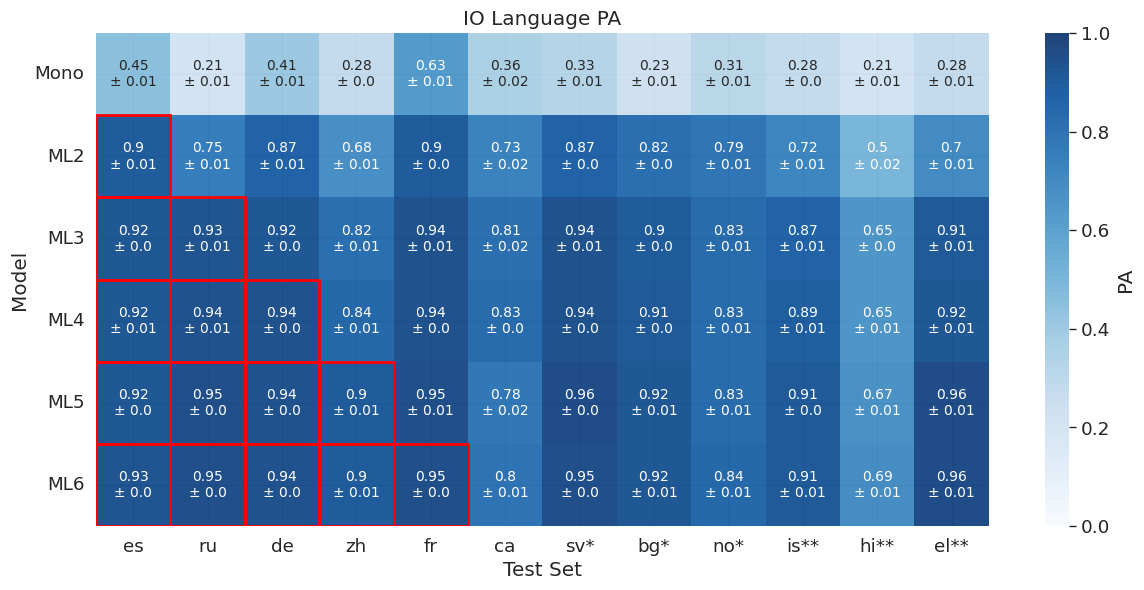

In [82]:
sdf = df[df['model_name'].isin(['Llama-2 Mono', 'Llama-2 ML2', 'Llama-2 ML3', 'Llama-2 ML4', 'Llama-2 ML5', 'Llama-2 ML6/ca'])]
sdf = sdf[sdf['test_set'].isin(['es', 'de', 'fr', 'ca', 'zh', 'ru', 'sv*', 'no*', 'bg*', 'is**', 'hi**', 'el**'])]
# aggregate
agg_sdf = get_agg_df(sdf).reset_index()
# join levels of multi-index columns
agg_sdf.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in agg_sdf.columns]

make_basic_heatmap(
    agg_sdf, 
    metric='lang_match',
    include_std=True,
    title='IO Language PA', 
    save_path='data/plots/llama2_7b_lang_match_heatmap_incremental_ml_seen_and_unseen.png',
    strip_from_model_name=['Llama-2 ', '/ca'],
    include_hatches=True
    )

(36, 8)
data/plots/llama2_7b_lang_match_heatmap_incremental_ml_unseen.png saved.


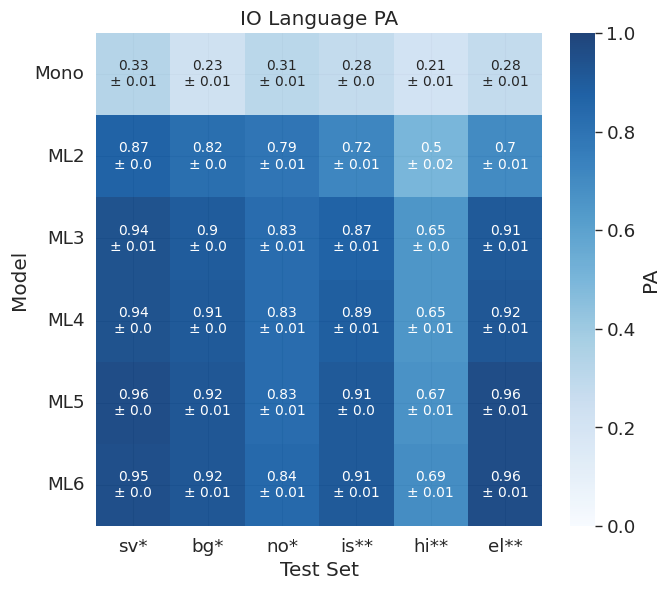

In [83]:
sdf = df[df['model_name'].isin(['Llama-2 Mono', 'Llama-2 ML2', 'Llama-2 ML3', 'Llama-2 ML4', 'Llama-2 ML4', 'Llama-2 ML5', 'Llama-2 ML6/ca'])]
sdf = sdf[sdf['test_set'].isin(['sv*', 'no*', 'bg*', 'is**', 'hi**', 'el**'])]
# aggregate
agg_sdf = get_agg_df(sdf).reset_index()
# join levels of multi-index columns
agg_sdf.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in agg_sdf.columns]

make_basic_heatmap(
    agg_sdf, 
    metric='lang_match',
    include_std=True,
    title='IO Language PA', 
    save_path='data/plots/llama2_7b_lang_match_heatmap_incremental_ml_unseen.png',
    strip_from_model_name=['Llama-2 ', '/ca']
    )

(84, 8)
data/plots/falcon_lang_match_heatmap_incremental_ml_unseen.png saved.


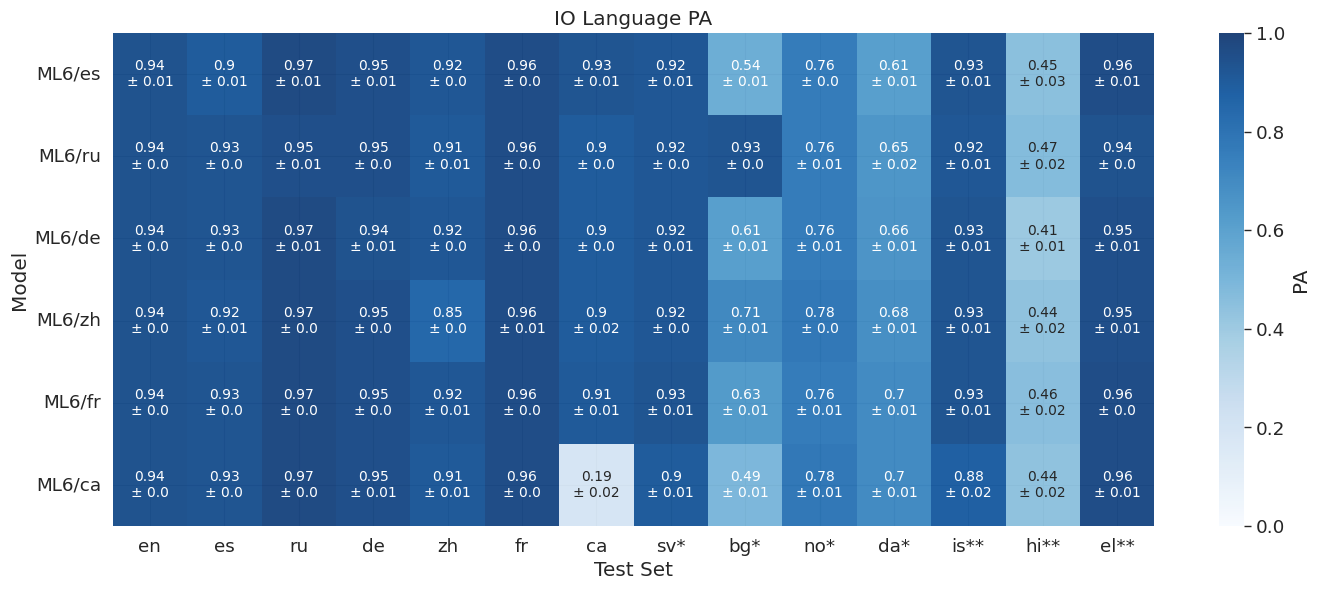

In [84]:
sdf = df[df['model_name'].isin(['Falcon ML6/de', 'Falcon ML6/zh', 'Falcon ML6/ru', 'Falcon ML6/ca', 'Falcon ML6/es', 'Falcon ML6/fr'])]
# sdf = sdf[sdf['test_set'].isin([ordered_test_sets])]
# aggregate
agg_sdf = get_agg_df(sdf).reset_index()
# join levels of multi-index columns
agg_sdf.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in agg_sdf.columns]

make_basic_heatmap(
    agg_sdf, 
    metric='lang_match',
    include_std=True,
    title='IO Language PA', 
    save_path='data/plots/falcon_lang_match_heatmap_incremental_ml_unseen.png',
    strip_from_model_name=['Falcon ']
    )

(72, 8)


data/plots/falcon_lang_match_heatmap_incremental_ml_seen_and_unseen.png saved.


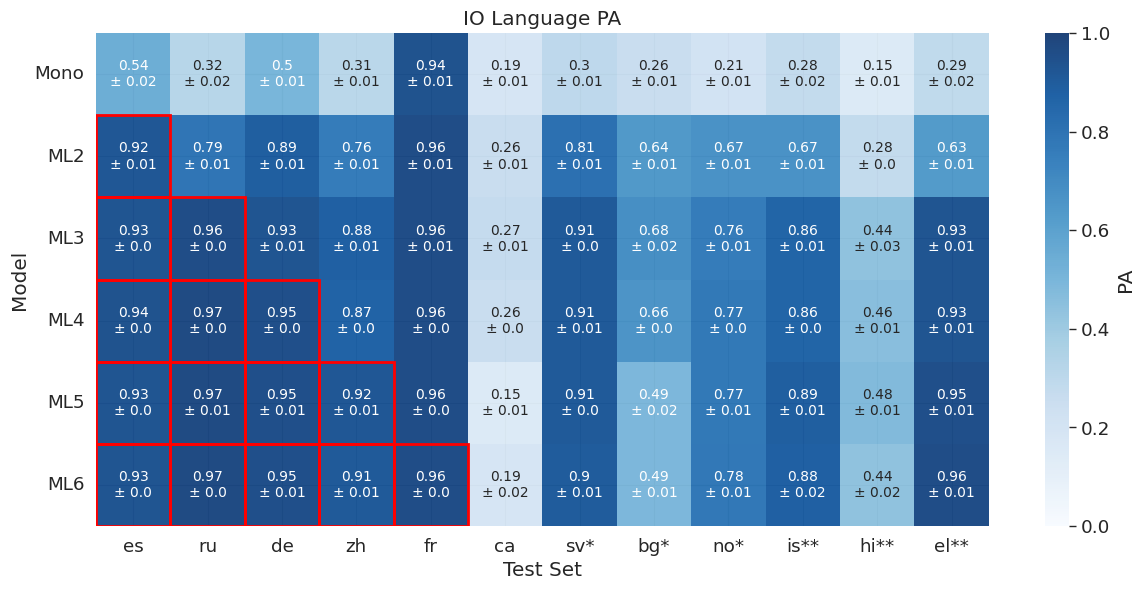

In [85]:
sdf = df[df['model_name'].isin(['Falcon Mono', 'Falcon ML2', 'Falcon ML3', 'Falcon ML4', 'Falcon ML5', 'Falcon ML6/ca'])]
sdf = sdf[sdf['test_set'].isin(['es', 'de', 'fr', 'ca', 'zh', 'ru', 'sv*', 'no*', 'bg*', 'is**', 'hi**', 'el**'])]
# aggregate
agg_sdf = get_agg_df(sdf).reset_index()
# join levels of multi-index columns
agg_sdf.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in agg_sdf.columns]

make_basic_heatmap(
    agg_sdf, 
    metric='lang_match',
    include_std=True,
    title='IO Language PA', 
    save_path='data/plots/falcon_lang_match_heatmap_incremental_ml_seen_and_unseen.png',
    strip_from_model_name=['Falcon ', '/ca'],
    include_hatches=True
    )

# process lm-eval harness results

In [86]:
def load_lm_eval_results_file(file):
    with open(file, "r", encoding='utf8') as f:
        df = pd.DataFrame.from_dict(json.load(f)['results'])
        df['model_name'] = Path(file).stem
        return df

def get_lm_eval_results(results_dir):
    dfs = []
    for results_file in Path(results_dir).glob('*.json'):
        print(results_file)
        df = load_lm_eval_results_file(results_file)
        dfs.append(df)
    df = pd.concat(dfs, axis=0, ignore_index=False).reset_index()
    df = df.rename(columns={'index': 'metric'})

    # Reshape the dataframe, moving model_name and index to the index
    df_long = pd.melt(df, id_vars=['model_name', 'metric'], var_name='task_lang', value_name='score')

    # Split the task_lang into two separate columns for 'task' and 'lang'
    df_long[['task', 'lang']] = df_long['task_lang'].str.split('_', expand=True)

    # Drop the original task_lang column as it's no longer needed
    df_long.drop('task_lang', axis=1, inplace=True)

    # Now pivot to get the 'task', 'lang' and 'index' as part of the column MultiIndex
    df = df_long.pivot_table(index='model_name', columns=['task', 'lang', 'metric'], values='score')

    # # move model_name to front
    # cols = df.columns.tolist()
    # cols.insert(0, cols.pop(cols.index('model_name')))
    # df = df.reindex(columns=cols)
    
    # # split task and lang tags into multiple levels

    # df.set_index(['model_name', 'metric'], inplace=True)
    # df = df.unstack(level='metric')
    
    df.info()

    return df

df = get_lm_eval_results('data/lm_evals')
df

data/lm_evals/llama_2_7b_hf_zh_merged.json
data/lm_evals/llama_2_7b_hf_de_merged.json
data/lm_evals/llama_2_7b_hf_fr_merged.json
data/lm_evals/llama_2_7b_hf_es_merged.json
data/lm_evals/llama_2_7b_hf_ca_merged.json
data/lm_evals/llama_2_7b_hf_ru_merged.json
data/lm_evals/llama_2_7b_hf_ml1_merged.json
data/lm_evals/llama_2_7b_hf_mt_ml2_merged.json
data/lm_evals/llama_2_7b_hf_ml2_merged.json
data/lm_evals/llama_2_7b_hf_mt_ml3_merged.json
data/lm_evals/llama_2_7b_hf_ml3_merged.json
data/lm_evals/llama_2_7b_hf_mt_ml4_merged.json
data/lm_evals/llama_2_7b_hf_ml4_merged.json
data/lm_evals/llama_2_7b_hf_mt_ml5_merged.json
data/lm_evals/llama_2_7b_hf_ml5_merged.json
data/lm_evals/llama_2_7b_hf_mt_ml6_merged.json
data/lm_evals/Llama-2-7b-hf.json
data/lm_evals/llama_2_7b_hf_guanaco_merged.json
data/lm_evals/llama_2_70b_hf_mt_ml1_merged.json
data/lm_evals/llama_2_70b_hf_mt_ml2_merged.json
data/lm_evals/llama_2_70b_hf_mt_ml3_merged.json
data/lm_evals/llama_2_70b_hf_mt_ml5_merged.json
data/lm_evals/

task                           pawsx                                        \
lang                              de                 en                 es   
metric                           acc acc_stderr     acc acc_stderr     acc   
model_name                                                                   
Llama-2-7b-hf                 0.6375   0.010752  0.6860   0.010381  0.6510   
llama_2_70b_hf_mt_ml1_merged  0.6595   0.010599  0.6680   0.010533  0.6395   
llama_2_70b_hf_mt_ml2_merged  0.6685   0.010529  0.6680   0.010533  0.6295   
llama_2_70b_hf_mt_ml3_merged  0.6570   0.010618  0.6820   0.010416  0.6415   
llama_2_70b_hf_mt_ml4_merged  0.6455   0.010699  0.6670   0.010541  0.6380   
llama_2_70b_hf_mt_ml5_merged  0.6350   0.010768  0.6855   0.010385  0.6470   
llama_2_70b_hf_mt_ml6_merged  0.6430   0.010716  0.6760   0.010467  0.6430   
llama_2_7b_hf_ca_merged       0.6485   0.010679  0.6955   0.010293  0.6710   
llama_2_7b_hf_de_merged       0.6465   0.010692  0.6970   0.010279  0.6775   
llama_2_7b_hf_es_merged       0.6480   0.010682  0.6965   0.010283  0.6745   
llama_2_7b_hf_fr_merged       0.6505   0.010665  0.6980   0.010269  0.6735   
llama_2_7b_hf_guanaco_merged  0.6560   0.010625  0.6950   0.010298  0.6750   
llama_2_7b_hf_ml1_merged      0.6430   0.010716  0.6935   0.010312  0.6680   
llama_2_7b_hf_ml2_merged      0.6450   0.010703  0.6950   0.010298  0.6715   
llama_2_7b_hf_ml3_merged      0.6480   0.010682  0.6930   0.010316  0.6710   
llama_2_7b_hf_ml4_merged      0.6490   0.010675  0.6945   0.010302  0.6725   
llama_2_7b_hf_ml5_merged      0.6475   0.010685  0.6955   0.010293  0.6725   
llama_2_7b_hf_mt_ml2_merged   0.6510   0.010661  0.6925   0.010321  0.6770   
llama_2_7b_hf_mt_ml3_merged   0.6555   0.010629  0.6900   0.010344  0.6810   
llama_2_7b_hf_mt_ml4_merged   0.6555   0.010629  0.6915   0.010330  0.6775   
llama_2_7b_hf_mt_ml5_merged   0.6590   0.010603  0.6925   0.010321  0.6750   
llama_2_7b_hf_mt_ml6_merged   0.6610   0.010588  0.6925   0.010321  0.6805   
llama_2_7b_hf_ru_merged       0.6540   0.010639  0.6970   0.010279  0.6740   
llama_2_7b_hf_zh_merged       0.6525   0.010650  0.6965   0.010283  0.6775   

task                                                                           \
lang                                         fr                 ja              
metric                       acc_stderr     acc acc_stderr     acc acc_stderr   
model_name                                                                      
Llama-2-7b-hf                  0.010661  0.5855   0.011018  0.4995   0.011183   
llama_2_70b_hf_mt_ml1_merged   0.010739  0.5810   0.011035  0.5545   0.011117   
llama_2_70b_hf_mt_ml2_merged   0.010802  0.5825   0.011030  0.5475   0.011133   
llama_2_70b_hf_mt_ml3_merged   0.010726  0.5740   0.011060  0.5510   0.011125   
llama_2_70b_hf_mt_ml4_merged   0.010749  0.5855   0.011018  0.5680   0.011079   
llama_2_70b_hf_mt_ml5_merged   0.010689  0.5815   0.011034  0.5395   0.011148   
llama_2_70b_hf_mt_ml6_merged   0.010716  0.5890   0.011005  0.5490   0.011129   
llama_2_7b_hf_ca_merged        0.010509  0.6040   0.010939  0.4995   0.011183   
llama_2_7b_hf_de_merged        0.010455  0.6045   0.010936  0.5025   0.011183   
llama_2_7b_hf_es_merged        0.010480  0.6020   0.010948  0.4980   0.011183   
llama_2_7b_hf_fr_merged        0.010488  0.6040   0.010939  0.4995   0.011183   
llama_2_7b_hf_guanaco_merged   0.010476  0.6000   0.010957  0.4920   0.011182   
llama_2_7b_hf_ml1_merged       0.010533  0.6040   0.010939  0.4975   0.011183   
llama_2_7b_hf_ml2_merged       0.010505  0.6045   0.010936  0.4980   0.011183   
llama_2_7b_hf_ml3_merged       0.010509  0.6060   0.010929  0.4970   0.011183   
llama_2_7b_hf_ml4_merged       0.010497  0.6005   0.010955  0.4945   0.011182   
llama_2_7b_hf_ml5_merged       0.010497  0.6060   0.010929  0.4945   0.011182   
llama_2_7b_hf_mt_ml2_merged    0.010459  0.6165   0.010875  0.4925   0.011182   
llama_2_7b_hf_mt_ml3_merged    0.

In [87]:
# combine acc with acc_stderr
# df['pawsx'] = df['acc'] + df['acc_stderr']
# df['pawsx']

def process_single_dataset_df(df):

    # multiply all numeric values by 100
    df[df.select_dtypes(include=['number']).columns] *= 100
    # round all numeric values to 2 decimal places
    df = df.round(2)

    # get the list of langs in dataframe from the multi-index
    langs = df.columns.get_level_values(0).unique().tolist()
    
    for lang in langs:
        acc_col = (lang, 'acc')
        stderr_col = (lang, 'acc_stderr') 
        df[lang] = df[acc_col].astype(str) + ' ± ' + df[stderr_col].astype(str)

    # drop all acc_stderr columns from multi-index
    df.drop(df.filter(like='acc_stderr').columns, axis=1, inplace=True)

    # drop 'metric' level from multi-index
    df.columns = df.columns.droplevel(level=1)

    # drop model_name as index
    df.reset_index(inplace=True)

    df.replace({'model_name': name_map}, inplace=True)

    print(df['model_name'].unique())

    # # sort rows by model_name in name_map
    df['model_name'] = pd.Categorical(df['model_name'], ordered_model_names)
    df = df.sort_values(by=['model_name'])
    # # Convert the columns back to their original data types
    df['model_name'] = df['model_name'].astype(str)
    
    # subscript the stderror values in each cell
    # df = df.style.format(lambda x: x.replace('±', '\pm '))

    return df
print('\nPAWS-X\n')
print(process_single_dataset_df(df['pawsx']).to_latex(index=False))
print('\nXNLI\n')
print(process_single_dataset_df(df['xnli']).to_latex(index=False))
print('\nX-Winograd\n')
print(process_single_dataset_df(df['xwinograd']).to_latex(index=False))



PAWS-X

['Llama-2 (base)' 'Llama-2 70B Mono' 'Llama-2 70B MT ML2'
 'Llama-2 70B MT ML3' 'Llama-2 70B MT ML4' 'Llama-2 70B MT ML5'
 'Llama-2 70B MT ML6' 'Llama-2 ML6/ca' 'Llama-2 ML6/de' 'Llama-2 ML6/es'
 'Llama-2 ML6/fr' 'Llama-2 Guanaco' 'Llama-2 Mono' 'Llama-2 ML2'
 'Llama-2 ML3' 'Llama-2 ML4' 'Llama-2 ML5' 'Llama-2 MT ML2'
 'Llama-2 MT ML3' 'Llama-2 MT ML4' 'Llama-2 MT ML5' 'Llama-2 MT ML6'
 'Llama-2 ML6/ru' 'Llama-2 ML6/zh']
\begin{tabular}{llllllll}
\toprule
        model\_name &           de &           en &           es &           fr &           ja &           ko &           zh \\
\midrule
      Llama-2 Mono &  64.3 ± 1.07 & 69.35 ± 1.03 &  66.8 ± 1.05 &  60.4 ± 1.09 & 49.75 ± 1.12 & 51.15 ± 1.12 &   59.2 ± 1.1 \\
       Llama-2 ML2 &  64.5 ± 1.07 &  69.5 ± 1.03 & 67.15 ± 1.05 & 60.45 ± 1.09 &  49.8 ± 1.12 & 51.45 ± 1.12 &   58.7 ± 1.1 \\
       Llama-2 ML3 &  64.8 ± 1.07 &  69.3 ± 1.03 &  67.1 ± 1.05 &  60.6 ± 1.09 &  49.7 ± 1.12 &  51.7 ± 1.12 &  58.85 ± 1.1 \\
       Llama-

/tmp/ipykernel_2980865/3695514957.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.select_dtypes(include=['number']).columns] *= 100
/tmp/ipykernel_2980865/3695514957.py:44: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(process_single_dataset_df(df['pawsx']).to_latex(index=False))
/tmp/ipykernel_2980865/3695514957.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [88]:
# def plot_single_dataset_df(df):

#     # get the list of langs in dataframe from the multi-index
#     langs = df.columns.get_level_values(0).unique().tolist()

#     print(langs)

#     fig, ax = plt.subplots(figsize=(len(langs), 3))

#     sns.barplot(data=df,
#                 x='lang', 
#                 y='metric', 
#                 hue='model_name', 
#                 errorbar=("ci", 95), capsize=0.3,
#                 err_kws={"linewidth": 1.0},
#                 alpha=1.0,
#                 # hue_order=ordered_test_sets,
#                 ax=ax)

#     # for lang in langs:
#     #     acc_col = (lang, 'acc')
#     #     stderr_col = (lang, 'acc_stderr') 
#     #     df[lang] = df[acc_col].astype(str) + ' ± ' + df[stderr_col].astype(str)

#     # # drop 'metric' level from multi-index
#     # df.columns = df.columns.droplevel(level=1)

#     # # drop model_name as index
#     # df.reset_index(inplace=True)

#     # df.replace({'model_name': name_map}, inplace=True)

#     # print(df['model_name'].unique())

#     # # # sort rows by model_name in name_map
#     # df['model_name'] = pd.Categorical(df['model_name'], ordered_model_names)
#     # df = df.sort_values(by=['model_name'])
#     # # # Convert the columns back to their original data types
#     # df['model_name'] = df['model_name'].astype(str)
    
#     # # subscript the stderror values in each cell
#     # # df = df.style.format(lambda x: x.replace('±', '\pm '))

#     return

# # print(plot_single_dataset_df(df['pawsx'].unstack(level=0).reset_index()))
# df_pawsx = df['pawsx'].unstack(level=0).reset_index()
# df_pawsx['index'] = df_pawsx.index
# df_pawsx.pivot(index='index', columns='metric', values=['metric', 'model_name', 0, 'lang'])
# df_pawsx
# # df_pawsx.to_csv('scratch/pawsx.csv', index=True)
# split 'metric' into two columns for 'acc' and 'acc_stderr'


# LLM Judge Results

In [110]:
def get_results(results_dir):
    """
    Collect all eval files in results_dir and parse them into a dataframe
    """
    dfs = []
    for llm_eval_file in sorted(Path(results_dir).glob('*/*.jsonl')):
        # print(llm_eval_file)
        df = pd.read_json(llm_eval_file, lines=True)

        model_name, test_set, prompt, seed, has_translation, n_eval_items, data_seed, api_seed, eval_src, eval_tgt = parse_filename(llm_eval_file)
        
        df['model_name'] = model_name
        df['test_set'] = test_set
        df['context'] = prompt
        df['seed'] = seed
        df['n_eval_items'] = n_eval_items
        df['data_seed'] = data_seed
        df['api_seed'] = api_seed
        df['eval_src'] = eval_src
        df['eval_tgt'] = eval_tgt

        dfs.append(df)
            
    print(f'Gathered {len(dfs)} dataframes.')
    df = pd.concat(dfs, axis=0, ignore_index=False, join='outer').reset_index(drop=True)

    # move input_file, model_name and seed to front
    cols = df.columns.tolist()
    cols.insert(0, cols.pop(cols.index('model_name')))
    cols.insert(1, cols.pop(cols.index('test_set')))
    cols.insert(2, cols.pop(cols.index('seed')))
    cols.insert(3, cols.pop(cols.index('eval_src')))
    cols.insert(4, cols.pop(cols.index('eval_tgt')))
    print(cols)
    df = df.reindex(columns=cols)

    return df

df = get_results('data/llm_evals/likert/gpt-3.5-turbo-1106')
print(len(df))

# inspect rows with NaN values in eval_score
# df[df['eval_score'].isna()]
# df[df['eval_score'] == 0]

# drop rows containing isna values in eval_score
df = df.dropna(subset=['eval_score'])
print(len(df))

# drop rows where eval_score is not between 1 and 6
df = df[(df['eval_score'] >= 1) & (df['eval_score'] <= 6)]
print(len(df))

# if 'system_lang' does not match 'source_lang', then set 'eval_score' to 1
df.loc[df['system_lang'] != df['source_lang'], 'eval_score'] = 1

# rename values according to name_map
df.replace({'model_name': name_map, 'test_set': name_map}, inplace=True)

# discard column with name "eval_Should I leave him. How do I like it?" - occurs once due to parsing errors from jsonl object returned from llm
# data/llm_evals/likert/gpt-3.5-turbo-1106/llama_2_7b_hf_ca_merged/alpaca_eval_instructions_el-none-guanaco_prompt-s0-k50-p0.9-t0.8-b8-with_en-l300-ds42-as42-source_en-system_en.jsonl
df = df.drop(columns=['eval_Should I leave him. How do I like it?'])

df = apply_sort(df, ordered_test_sets=ordered_alpaca_test_sets)

# inspect total tokens from eval_meta
eval_costs = []
for i, row in df.iterrows():
    # eval_tokens.append(row['eval_meta']['prompt_tokens'] + row['eval_meta']['completion_tokens'])
    cost = row['eval_meta']['cost']
    if isinstance(row['translation_meta'], dict):
        cost += row['translation_meta']['cost']
    eval_costs.append(cost)

print(len(df))
print(len(eval_costs))
print(np.mean(eval_costs))
print(max(eval_costs))
print(min(eval_costs))
print(sum(eval_costs))

# drop columns: eval_meta, translation_meta, prompt, source, system
df = df.drop(columns=['eval_meta', 'translation_meta', 'prompt', 'source', 'system', 'source_en', 'system_en', 'eval_reasoning'])
len(df)

# check that for each model, the same ids are evaluated
all_ids = set()
for model_name in df['model_name'].unique():
    ids = df[df['model_name'] == model_name]['id'].unique()
    all_ids.update(ids)
print(len(all_ids))

df.info()

Gathered 930 dataframes.
['model_name', 'test_set', 'seed', 'eval_src', 'eval_tgt', 'prompt', 'system', 'finish_reason', 'source', 'secs', 'source_lang', 'system_lang', 'id', 'eval_reasoning', 'eval_score', 'eval_meta', 'context', 'n_eval_items', 'data_seed', 'api_seed', 'source_en', 'system_en', 'translation_meta', 'eval_Should I leave him. How do I like it?']
279000
278924
278702
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278702 entries, 0 to 278701
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   model_name        278702 non-null  object 
 1   test_set          278702 non-null  object 
 2   seed              278702 non-null  int64  
 3   eval_src          278702 non-null  object 
 4   eval_tgt          278702 non-null  object 
 5   prompt            278702 non-null  object 
 6   system            278702 non-null  object 
 7   finish_reason     278702 non-null  object 
 8   source            2

In [111]:
# # aggregate score by model_name, test_set, seed
# agg_df = df[df['eval_src'] == 'source'].groupby(['model_name', 'test_set'], as_index=False).agg({'eval_score': [np.mean, np.std]})
# agg_df

# # aggregate score by model_name, test_set, seed
# agg_df = df[df['eval_src'] == 'source_en'].groupby(['model_name', 'test_set'], as_index=False).agg({'eval_score': [np.mean, np.std]})
# agg_df


In [112]:
print(df['model_name'].value_counts())
print(df['eval_src'].value_counts())
print(df['eval_tgt'].value_counts())
print(df['eval_score'].value_counts())
print(df['test_set'].value_counts())
print(df['id'].value_counts())

Llama-2 ML6/ca         17984
Llama-2 Guanaco         9898
Falcon Guanaco          9896
Llama-2 ML5             9894
Falcon ML6/ca           9893
                       ...  
Llama-2 MTOL ML6/ca     3596
Llama-2 ML6/de          2699
Llama-2 ML6/zh          2699
Llama-2 ML6/ru          2697
Llama-2 ML6/fr          1798
Name: model_name, Length: 31, dtype: int64
source       267010
source_en     11692
Name: eval_src, dtype: int64
system       267010
system_en     11692
Name: eval_tgt, dtype: int64
1.0    121716
4.0     45236
5.0     32926
3.0     29464
2.0     27670
6.0     21690
Name: eval_score, dtype: int64
de      26982
en      26971
zh      26964
ru      26950
fr      26073
no*     24287
bg*     24283
is**    24276
sv*     24274
el**    24268
hi**    23374
Name: test_set, dtype: int64
192    930
507    930
383    930
362    930
486    930
      ... 
655    919
537    916
631    908
199    908
667    812
Name: id, Length: 300, dtype: int64


In [114]:
df.head()

,model_name,test_set,seed,eval_src,eval_tgt,finish_reason,secs,source_lang,system_lang,id,eval_score,context,n_eval_items,data_seed,api_seed
0,Llama-2 Mono,en,0,source,system,stop,0.793132,eng_Latn,eng_Latn,192,5.0,guanaco_prompt,300,42,42
1,Llama-2 Mono,en,0,source,system,stop,1.108659,eng_Latn,eng_Latn,718,6.0,guanaco_prompt,300,42,42
2,Llama-2 Mono,en,0,source,system,stop,2.605155,eng_Latn,eng_Latn,168,3.0,guanaco_prompt,300,42,42
3,Llama-2 Mono,en,0,source,system,stop,1.376305,eng_Latn,eng_Latn,522,4.0,guanaco_prompt,300,42,42
4,Llama-2 Mono,en,0,source,system,stop,0.841068,eng_Latn,eng_Latn,536,5.0,guanaco_prompt,300,42,42


In [115]:
# set pandas settings to display more rows
pd.set_option('display.max_rows', 50)
df['model_name'].value_counts()

Llama-2 ML6/ca         17984
Llama-2 Guanaco         9898
Falcon Guanaco          9896
Llama-2 ML5             9894
Falcon ML6/ca           9893
Llama-2 MT ML6          9892
Falcon Mono             9892
Llama-2 70B Mono        9891
Falcon ML5              9891
Llama-2 70B Guanaco     9891
Llama-2 MT ML3          9890
Llama-2 MT ML5          9890
Llama-2 ML2             9890
Llama-2 MT ML2          9890
Llama-2 Mono            9889
Llama-2 70B MT ML5      9888
Llama-2 70B MT ML4      9888
Falcon ML2              9888
Llama-2 MT ML4          9887
Llama-2 70B MT ML3      9887
Llama-2 ML3             9887
Llama-2 ML4             9886
Falcon ML4              9886
Falcon ML3              9885
Llama-2 70B MT ML2      9881
Llama-2 70B MT ML6      9879
Llama-2 MTOL ML6/ca     3596
Llama-2 ML6/de          2699
Llama-2 ML6/zh          2699
Llama-2 ML6/ru          2697
Llama-2 ML6/fr          1798
Name: model_name, dtype: int64

['Mono' 'ML2' 'ML3' 'ML4' 'ML5' 'ML6' 'Guanaco']
saved to data/plots/llm_judge_llama_7b_incremental_ml_wide.png


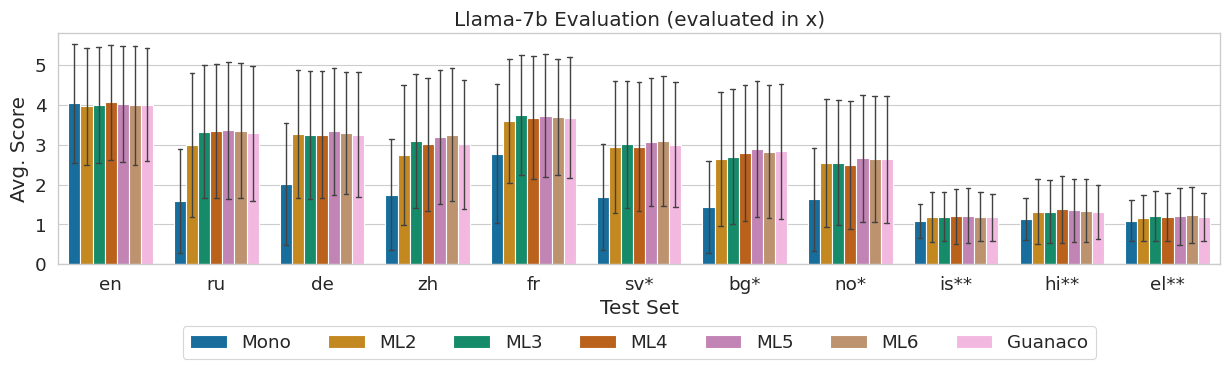

In [116]:

def plot_score_distribution(df, title=None, save_path=None):

    # for each test set, plot the distribution of eval_score for each model
    fig, ax = plt.subplots(figsize=(15, 3))
    
    test_sets = [l for l in ordered_alpaca_test_sets if l in df['test_set'].unique()]
    model_names = df['model_name'].unique()
    print(model_names)
    # sns.boxplot(data=df, x='test_set', y='eval_score', hue='model_name', ax=ax)
    # sns.barplot(data=df, x='test_set', y='eval_score', hue='model_name', ax=ax)
    sns.barplot(data=df, x='test_set', y='eval_score', hue='model_name', ax=ax,  
                # errorbar=("ci", 95), capsize=0.3,
                errorbar='sd', capsize=0.3,
                err_kws={"linewidth": 1.0},
                alpha=1.0,
                order=test_sets,
                hue_order=model_names,
                )
    
    # sns.violinplot(data=df, x='test_set', y='eval_score', hue='model_name', ax=ax, 
    #                fill=True, density_norm="count", common_norm=True,
    #             #    split=True,
    #                inner="quart",
    #                dodge=True, gap=0.3,
    #                alpha=0.8,
    #             #    inner_kws=dict(box_width=4, whis_width=1, color=".8"),
    #                inner_kws=dict(color=".8"),
    #                )
    
    # apply hatches to certain bars
    # for p in ax.patches:
    #     print(p)

    # # remove bars from sorted that correspond to the legend
    # bars = [patch for patch in ax.patches if patch.xy != (0, 0)]

    # sorted_bars = sorted(bars, key=lambda bar: bar.get_x(), reverse=False)
    
    # # Create a dictionary to map each bar to its 'test_set' and 'model_name'
    # bar_info = {}
    # for i, test_set in enumerate(test_sets):
    #     for j, model_name in enumerate(model_names):
    # #         # The index of the bar in the patches list
    #         index = i * len(model_names) + j
    #         bar_info[sorted_bars[index]] = {'test_set': test_set, 'model_name': model_name}

    # # Loop over the bars and add a text label as a marker
    # for i, (bar, info) in enumerate(bar_info.items()):
    #     if info['test_set'] in training_langs[info['model_name'].split()[-1]]:
    #         bar.set_hatch('//')
    #     else:
    #         bar.set_hatch('')

    
    
    ax.set_xlabel('Test Set')
    ax.set_ylabel('Avg. Score')
    
    ax.set_title(title)

    # legend at bottom
    if len(test_sets) >= 6:
        ncols = len(model_names)
        y_offset = -0.45
    else:
        ncols = 3
        y_offset = -0.55
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, y_offset), ncol=ncols)

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
        print(f'saved to {save_path}')

    return


sdf = df[df['model_name'].isin(['Llama-2 Mono', 'Llama-2 ML2', 'Llama-2 ML3', 'Llama-2 ML4', 'Llama-2 ML5', 'Llama-2 ML6/ca', 'Llama-2 Guanaco'])]
sdf = sdf[sdf['test_set'].isin(ordered_alpaca_test_sets)]
sdf = sdf[ (sdf['eval_src'] == 'source') & (sdf['eval_tgt'] == 'system') ]
sdf['model_name'] = sdf['model_name'].str.replace('Llama-2 ', '').str.replace('/ca', '')

plot_score_distribution(
    sdf, 
    title='Llama-7b Evaluation (evaluated in x)',
    save_path='data/plots/llm_judge_llama_7b_incremental_ml_wide.png'
    )

# plot_score_distribution(df[ ((df['eval_src'] == 'source_en') & (df['eval_tgt'] == 'system_en')) | (df['test_set'] == 'en') ], title='Evaluated in en')


MT ML6    9892
MT ML2    9890
MT ML3    9890
MT ML5    9890
Mono      9889
MT ML4    9887
Name: model_name, dtype: int64
['Mono' 'MT ML2' 'MT ML3' 'MT ML4' 'MT ML5' 'MT ML6']
saved to data/plots/llm_judge_llama_7b_incremental_mt_ml_wide.png


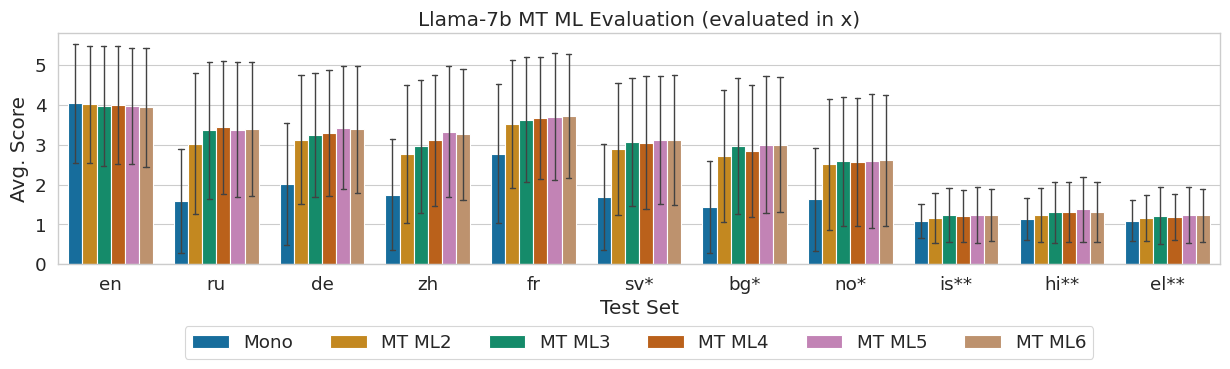

In [119]:
sdf = df[df['model_name'].isin(['Llama-2 Mono', 'Llama-2 MT ML2', 'Llama-2 MT ML3', 'Llama-2 MT ML4', 'Llama-2 MT ML5', 'Llama-2 MT ML6'])]
sdf = sdf[sdf['test_set'].isin(ordered_alpaca_test_sets)]
sdf = sdf[ (sdf['eval_src'] == 'source') & (sdf['eval_tgt'] == 'system') ]
sdf['model_name'] = sdf['model_name'].str.replace('Llama-2', '').str.strip()
# print(len(sdf))
print(sdf['model_name'].value_counts())
plot_score_distribution(
    sdf, 
    title='Llama-7b MT ML Evaluation (evaluated in x)',
    save_path='data/plots/llm_judge_llama_7b_incremental_mt_ml_wide.png'
    )


Mono      9891
MT ML4    9888
MT ML5    9888
MT ML3    9887
MT ML2    9881
MT ML6    9879
Name: model_name, dtype: int64
['Mono' 'MT ML2' 'MT ML3' 'MT ML4' 'MT ML5' 'MT ML6']
saved to data/plots/llm_judge_llama_70b_incremental_mt_ml_wide.png


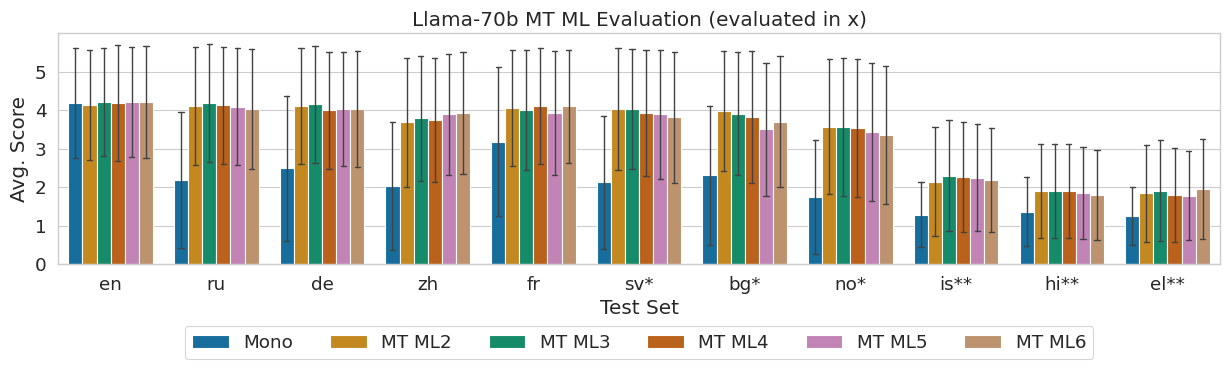

In [122]:
sdf = df[df['model_name'].isin(['Llama-2 70B Mono', 'Llama-2 70B MT ML2', 'Llama-2 70B MT ML3', 'Llama-2 70B MT ML4', 'Llama-2 70B MT ML5', 'Llama-2 70B MT ML6'])]
sdf = sdf[sdf['test_set'].isin(ordered_alpaca_test_sets)]
sdf = sdf[ (sdf['eval_src'] == 'source') & (sdf['eval_tgt'] == 'system') ]
sdf['model_name'] = sdf['model_name'].str.replace('Llama-2 70B', '').replace('MT', '').str.strip()
# print(len(sdf))
print(sdf['model_name'].value_counts())
plot_score_distribution(
    sdf, 
    title='Llama-70b MT ML Evaluation (evaluated in x)',
    save_path='data/plots/llm_judge_llama_70b_incremental_mt_ml_wide.png'
    )


In [123]:
# sdf = df[df['model_name'].isin(['Llama-2 MTOL ML6/ca'])]
# sdf = sdf[sdf['test_set'].isin(ordered_test_sets)]
# # sdf = sdf[ (sdf['eval_src'] == 'source') & (sdf['eval_tgt'] == 'system') ]
# # sdf['model_name'] = sdf['model_name'].str.replace('Llama-2 70B', '')
# # print(len(sdf))
# print(sdf['model_name'].value_counts())
# plot_score_distribution(
#     sdf, 
#     title='Llama-70b Evaluation (evaluated in x)',
#     save_path='data/plots/llm_judge_7b_incremental_ml_mtol_wide.png'
#     )

69231
Guanaco    9896
ML6/ca     9893
Mono       9892
ML5        9891
ML2        9888
ML4        9886
ML3        9885
Name: model_name, dtype: int64
['Mono' 'ML2' 'ML3' 'ML4' 'ML5' 'ML6/ca' 'Guanaco']
saved to data/plots/llm_judge_falcon_7b_incremental_ml_wide.png


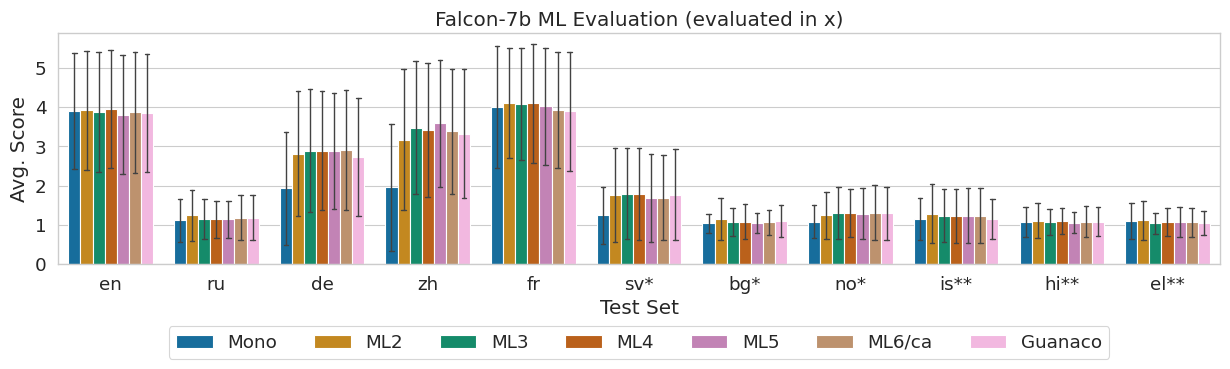

In [124]:
sdf = df[df['model_name'].isin(['Falcon Mono', 'Falcon ML2', 'Falcon ML3', 'Falcon ML4', 'Falcon ML5', 'Falcon ML6/ca', 'Falcon Guanaco'])]
sdf = sdf[sdf['test_set'].isin(ordered_alpaca_test_sets)]
sdf = sdf[ (sdf['eval_src'] == 'source') & (sdf['eval_tgt'] == 'system') ]
sdf['model_name'] = sdf['model_name'].str.replace('Falcon', '').replace('/ca', '').str.strip()
print(len(sdf))
print(sdf['model_name'].value_counts())
plot_score_distribution(
    sdf, 
    title='Falcon-7b ML Evaluation (evaluated in x)',
    save_path='data/plots/llm_judge_falcon_7b_incremental_ml_wide.png'
    )

In [125]:
# sdf = df[ (df['model_name'].isin([
#     'Llama-2 ML2', 'Llama-2 MT ML2', 
#     'Llama-2 ML3', 'Llama-2 MT ML3', 
#     'Llama-2 ML4', 'Llama-2 MT ML4',
#     'Llama-2 ML5', 'Llama-2 MT ML5'
#     'Llama-2 ML6/ca', 'Llama-2 MT ML6'
#     ])) ]
# sdf = sdf[sdf['test_set'].isin(['de'])]
# print(sdf['model_name'].value_counts())
# print(sdf['test_set'].value_counts())

# plot_score_distribution(
#     sdf, 
#     title='Distribution of scores based on MT ML',
#     # save_path='data/plots/llm_judge_7b_translated_vs_direct_eval.png'
#     )


saved to data/plots/llm_judge_llama_7b_translated_vs_direct_eval.png
saved to data/plots/llm_judge_llama_7b_s0_translated_vs_direct_eval.png
saved to data/plots/llm_judge_llama_7b_s42_translated_vs_direct_eval.png
saved to data/plots/llm_judge_llama_7b_s723_translated_vs_direct_eval.png


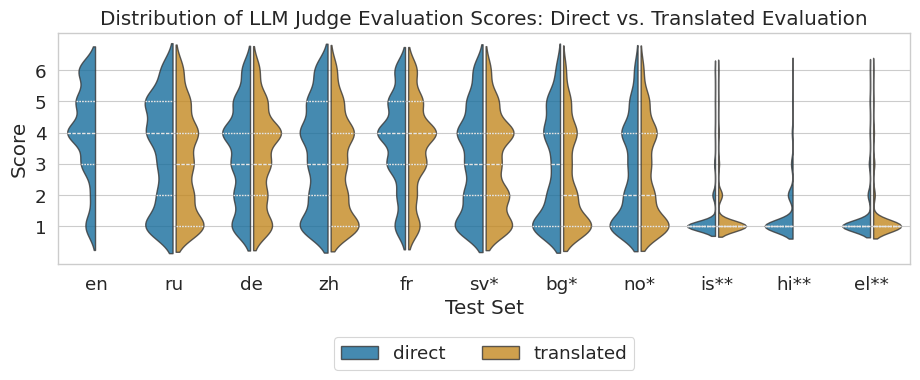

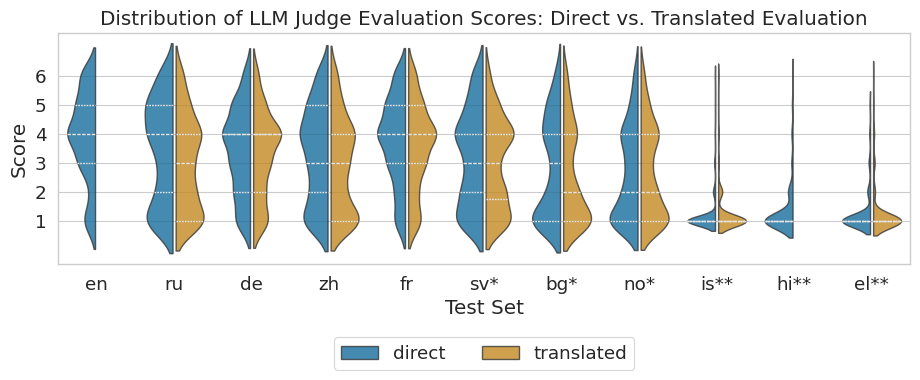

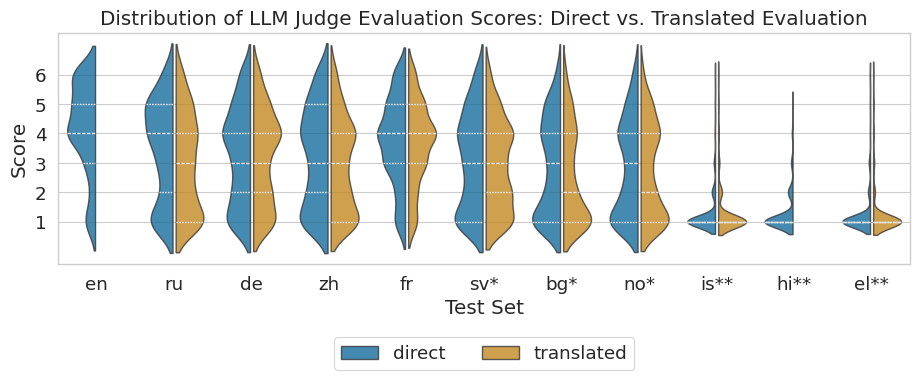

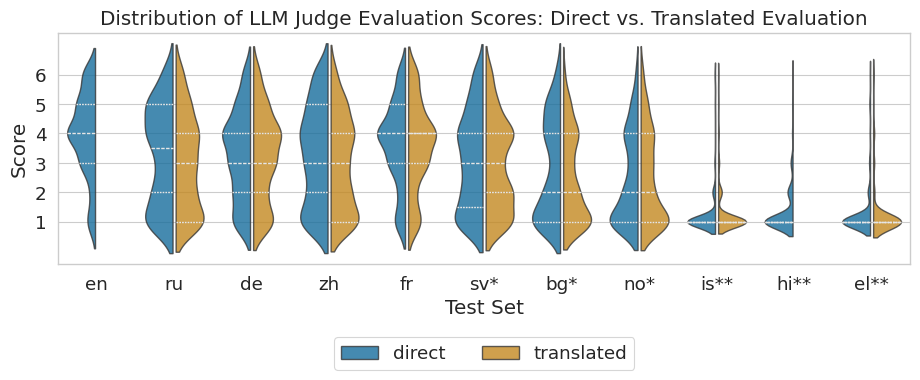

In [126]:

def plot_score_distribution_with_split_violins(df, title=None, save_path=None, hue='eval_type'):

    # for each test set, plot the distribution of eval_score for each model
    
    test_sets = [l for l in ordered_alpaca_test_sets if l in df['test_set'].unique()]
    model_names = df['model_name'].unique()
    
    fig, ax = plt.subplots(figsize=(len(test_sets), 3))
    
    sns.violinplot(data=df, x='test_set', y='eval_score', hue=hue, ax=ax, 
                   fill=True, density_norm="count", common_norm=True,
                   split=True,
                   inner="quart",
                   dodge=True, gap=0.1,
                   alpha=0.8,
                   order=test_sets,
                #    inner_kws=dict(box_width=4, whis_width=1, color=".8"),
                   inner_kws=dict(color=".9"),
                   )
    
    ax.set_xlabel('Test Set')
    ax.set_ylabel('Score')
    
    # set y-ticks to integers 1-6
    ax.set_yticks(range(1, 7))

    ax.set_title(title)

    # place legend outside of plot at bottom with 3 columns
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=3)

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
        print(f'saved to {save_path}')

    return

sdf = df[ (df['model_name'].isin(['Llama-2 ML6/ca'])) ] 
sdf = sdf[sdf['test_set'].isin(ordered_alpaca_test_sets)]

sdf['eval_type'] = sdf.apply(lambda x: "translated" if x['eval_src'] == 'source_en' else "direct", axis=1)

plot_score_distribution_with_split_violins(
    sdf, 
    title='Distribution of LLM Judge Evaluation Scores: Direct vs. Translated Evaluation',
    save_path='data/plots/llm_judge_llama_7b_translated_vs_direct_eval.png'
    )

for seed in [0, 42, 723]:
    sdf = df[ (df['model_name'].isin(['Llama-2 ML6/ca'])) & (df['seed'] == seed) ] 
    sdf = sdf[sdf['test_set'].isin(ordered_alpaca_test_sets)]

    sdf['eval_type'] = sdf.apply(lambda x: "translated" if x['eval_src'] == 'source_en' else "direct", axis=1)

    plot_score_distribution_with_split_violins(
        sdf, 
        title='Distribution of LLM Judge Evaluation Scores: Direct vs. Translated Evaluation',
        save_path=f'data/plots/llm_judge_llama_7b_s{seed}_translated_vs_direct_eval.png'
        )

# translation results

In [130]:


def get_results(results_dir):
    """
    Collect all eval files in results_dir and parse them into a dataframe
    """
    dfs = []
    for eval_file in sorted(Path(results_dir).glob('*/*.eval')):
        # print(eval_file)
        df = pd.read_csv(eval_file, index_col=None)
        # print(eval_file)
        model_name, test_set, prompt, seed, has_translation, n_eval_items, data_seed, api_seed, eval_src, eval_tgt = parse_filename(eval_file)
        
        df['model_name'] = model_name
        df['test_set'] = test_set
        df['prompt'] = prompt
        df['seed'] = seed
        df['n_eval_items'] = n_eval_items
        df['data_seed'] = data_seed
        df['api_seed'] = api_seed
        df['eval_src'] = eval_src
        df['eval_tgt'] = eval_tgt

        dfs.append(df)
            
    # print(f'Gathered {len(dfs)} dataframes.')
    df = pd.concat(dfs, axis=0, ignore_index=False, join='outer').reset_index(drop=True)

    # # move input_file, model_name and seed to front
    cols = df.columns.tolist()
    cols.insert(0, cols.pop(cols.index('model_name')))
    cols.insert(1, cols.pop(cols.index('test_set')))
    cols.insert(2, cols.pop(cols.index('seed')))
    cols.insert(3, cols.pop(cols.index('prompt')))
    
    df = df.reindex(columns=cols)

    return df

df = get_results('data/flores_outputs')

# rename values according to name_map
# TODO: fix Falcon Guanaco being mapped to nan
df.replace({'model_name': name_map, 'test_set': name_map}, inplace=True)

df = apply_sort(df, ordered_test_sets=ordered_flores_test_sets)

df['prompt_lang'] = df.apply(lambda x: 'X' if x['prompt'].split('_')[-1] == x['test_set'][:2] else 'en' if x['prompt'].split('_')[-1] == 'en' else 'unk', axis=1)
print(df['prompt_lang'].value_counts())

print(df['model_name'].value_counts())
df.head()

# x = ['falcon_7b_ca_merged',
# 'falcon_7b_de_merged',
# 'llama_2_7b_hf_ru_merged',
# 'llama_2_7b_hf_ml5_merged',
# 'llama_2_7b_hf_ml3_merged',
# 'llama_2_7b_hf_ml2_merged',
# 'llama_2_7b_hf_ml1_merged',
# 'llama_2_7b_hf_guanaco_merged',
# 'llama_2_7b_hf_fr_merged',
# 'llama_2_7b_hf_es_merged',
# 'llama_2_7b_hf_de_merged',
# 'llama_2_7b_hf_ca_merged',
# 'falcon_7b_zh_merged',
# 'falcon_7b_ru_merged',
# 'falcon_7b_ml5_merged',
# 'falcon_7b_ml4_merged',
# 'falcon_7b_ml3_merged',
# 'falcon_7b_ml2_merged',
# 'falcon_7b_ml1_merged',
# 'falcon_7b_guanaco_merged',
# 'llama_2_7b_hf_zh_merged',
# 'llama_2_7b_hf_ml4_merged',
# ]
# print([name_map[i] for i in x])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model_name    1871 non-null   object 
 1   test_set      1871 non-null   object 
 2   seed          1871 non-null   int64  
 3   prompt        1871 non-null   object 
 4   lang_match    1871 non-null   float64
 5   tgt_lang      1871 non-null   float64
 6   ppl           0 non-null      float64
 7   ppl_model     0 non-null      float64
 8   bleu          1871 non-null   float64
 9   chrf          1871 non-null   float64
 10  n             1871 non-null   int64  
 11  file          1871 non-null   object 
 12  n_eval_items  0 non-null      object 
 13  data_seed     0 non-null      object 
 14  api_seed      0 non-null      object 
 15  eval_src      0 non-null      object 
 16  eval_tgt      0 non-null      object 
dtypes: float64(6), int64(2), object(9)
memory usage: 248.6+ KB
X     936
en

,model_name,test_set,seed,prompt,lang_match,tgt_lang,ppl,ppl_model,bleu,chrf,n,file,n_eval_items,data_seed,api_seed,eval_src,eval_tgt,prompt_lang
0,Llama-2 Mono,es,0,flores_en_es_en,0.010,0.984,NaN,NaN,20.297,65.262,1012,data/flores_outputs/llama_2_7b_hf_ml1_merged/flores_devtest_en_es-none-flores_en_es_en-s0-k50-p0.9-t0.001-b128.jsonl,None,None,None,None,None,en
1,Llama-2 Mono,es,0,flores_en_es_es,0.003,0.990,NaN,NaN,21.835,67.521,1012,data/flores_outputs/llama_2_7b_hf_ml1_merged/flores_devtest_en_es-none-flores_en_es_es-s0-k50-p0.9-t0.001-b128.jsonl,None,None,None,None,None,X
2,Llama-2 Mono,es,42,flores_en_es_en,0.011,0.983,NaN,NaN,20.249,65.264,1012,data/flores_outputs/llama_2_7b_hf_ml1_merged/flores_devtest_en_es-none-flores_en_es_en-s42-k50-p0.9-t0.001-b128.jsonl,None,None,None,None,None,en
3,Llama-2 Mono,es,42,flores_en_es_es,0.003,0.990,NaN,NaN,21.858,67.547,1012,data/flores_outputs/llama_2_7b_hf_ml1_merged/flores_devtest_en_es-none-flores_en_es_es-s42-k50-p0.9-t0.001-b128.jsonl,None,None,None,None,None,X
4,Llama-2 Mono,es,723,flores_en_es_en,0.010,0.984,NaN,NaN,20.260,65.235,1012,data/flores_outputs/llama_2_7b_hf_ml1_merged/flores_devtest_en_es-none-flores_en_es_en-s723-k50-p0.9-t0.001-b128.jsonl,None,None,None,None,None,en


/tmp/ipykernel_2980865/3621878209.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['model_name'] = sdf['model_name'].str.replace('Llama-2', '').str.replace('/ca', '').str.strip()


saved to data/plots/flores_mt_llama_7b_incremental_ml_wide_xprompt_bleu.png
saved to data/plots/flores_mt_llama_7b_incremental_ml_wide_enprompt_bleu.png


/tmp/ipykernel_2980865/3621878209.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['model_name'] = sdf['model_name'].str.replace('Llama-2', '').str.replace('/ca', '').str.strip()


saved to data/plots/flores_mt_llama_7b_incremental_ml_wide_xprompt_chrf.png
saved to data/plots/flores_mt_llama_7b_incremental_ml_wide_enprompt_chrf.png


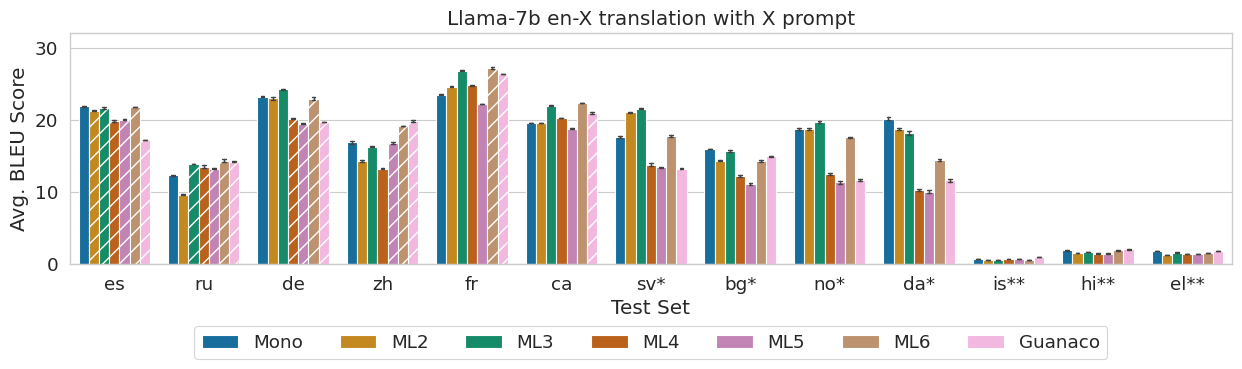

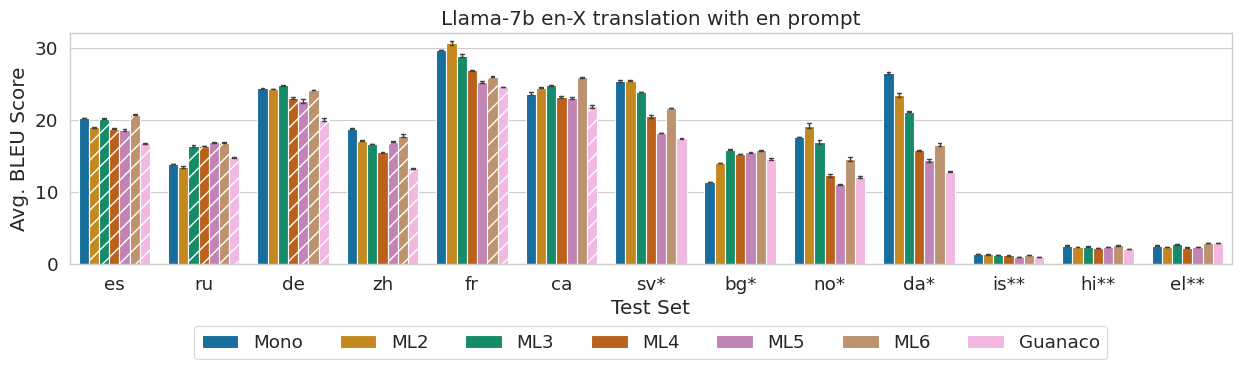

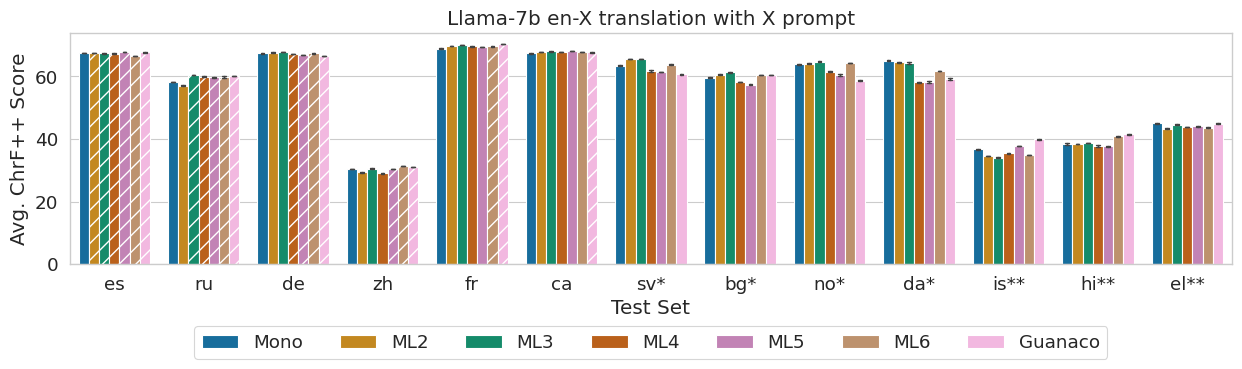

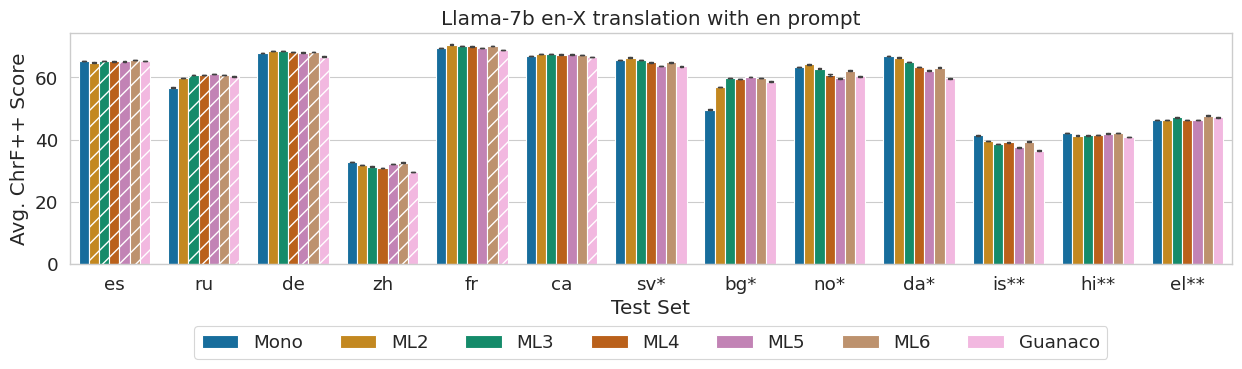

In [134]:

def plot_mt_score_distribution(df, metric='bleu', title=None, save_path=None):

    # for each test set, plot the distribution of eval_score for each model
    fig, ax = plt.subplots(figsize=(15, 3))
    
    test_sets = [l for l in ordered_flores_test_sets if l in df['test_set'].unique()]
    model_names = df['model_name'].unique()
    
    # sns.boxplot(data=df, x='test_set', y='eval_score', hue='model_name', ax=ax)
    # sns.barplot(data=df, x='test_set', y='eval_score', hue='model_name', ax=ax)
    sns.barplot(data=df, x='test_set', y=metric, hue='model_name', ax=ax,  
                # errorbar=("ci", 95), capsize=0.3,
                errorbar='sd', capsize=0.3,
                err_kws={"linewidth": 1.0},
                alpha=1.0,
                order=test_sets,
                hue_order=model_names,
                )
    
    # apply hatches to certain bars
    # for p in ax.patches:
    #     print(p)

    # remove bars from sorted that correspond to the legend
    bars = [patch for patch in ax.patches if patch.xy != (0, 0)]

    sorted_bars = sorted(bars, key=lambda bar: bar.get_x(), reverse=False)
    
    # Create a dictionary to map each bar to its 'test_set' and 'model_name'
    bar_info = {}
    for i, test_set in enumerate(test_sets):
        for j, model_name in enumerate(model_names):
    #         # The index of the bar in the patches list
            index = i * len(model_names) + j
            bar_info[sorted_bars[index]] = {'test_set': test_set, 'model_name': model_name}

    # Loop over the bars and add a text label as a marker
    for i, (bar, info) in enumerate(bar_info.items()):
        if info['test_set'] in training_langs[info['model_name'].split()[-1]]:
            bar.set_hatch('//')
        else:
            bar.set_hatch('')

    
    ax.set_xlabel('Test Set')
    if metric == 'bleu':
        ax.set_ylabel(f'Avg. BLEU Score')
        ax.set_ylim(0, 32)
    elif metric == 'chrf':
        ax.set_ylabel(f'Avg. ChrF++ Score')
    
    ax.set_title(title)

    # legend at bottom
    if len(test_sets) >= 6:
        ncols = len(model_names)
        y_offset = -0.45
    else:
        ncols = 3
        y_offset = -0.55
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, y_offset), ncol=ncols)

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
        print(f'saved to {save_path}')

    return

for metric in ['bleu', 'chrf']:
    sdf = df[df['model_name'].isin(['Llama-2 Mono', 'Llama-2 ML2', 'Llama-2 ML3', 'Llama-2 ML4', 'Llama-2 ML5', 'Llama-2 ML6/ca', 'Llama-2 Guanaco'])]
    sdf['model_name'] = sdf['model_name'].str.replace('Llama-2', '').str.replace('/ca', '').str.strip()
    
    # using x prompt
    plot_mt_score_distribution(
        sdf[ (sdf['prompt_lang'] == 'X') ],
        metric=metric, 
        title='Llama-7b en-X translation with X prompt',
        save_path=f'data/plots/flores_mt_llama_7b_incremental_ml_wide_xprompt_{metric}.png'
        )

    # usng en prompt
    plot_mt_score_distribution(
        sdf[ (sdf['prompt_lang'] == 'en') ],
        metric=metric, 
        title='Llama-7b en-X translation with en prompt',
        save_path=f'data/plots/flores_mt_llama_7b_incremental_ml_wide_enprompt_{metric}.png'
        )



/tmp/ipykernel_2980865/3597865811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['model_name'] = sdf['model_name'].str.replace('Llama-2', '').str.strip()


saved to data/plots/flores_mt_llama_7b_loo_wide_xprompt_bleu.png


saved to data/plots/flores_mt_llama_7b_loo_wide_enprompt_bleu.png


/tmp/ipykernel_2980865/3597865811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['model_name'] = sdf['model_name'].str.replace('Llama-2', '').str.strip()


saved to data/plots/flores_mt_llama_7b_loo_wide_xprompt_chrf.png
saved to data/plots/flores_mt_llama_7b_loo_wide_enprompt_chrf.png


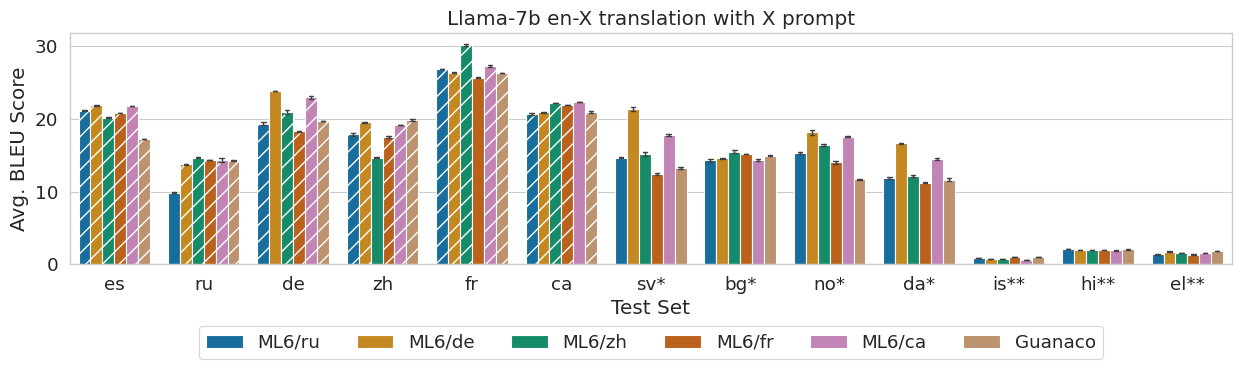

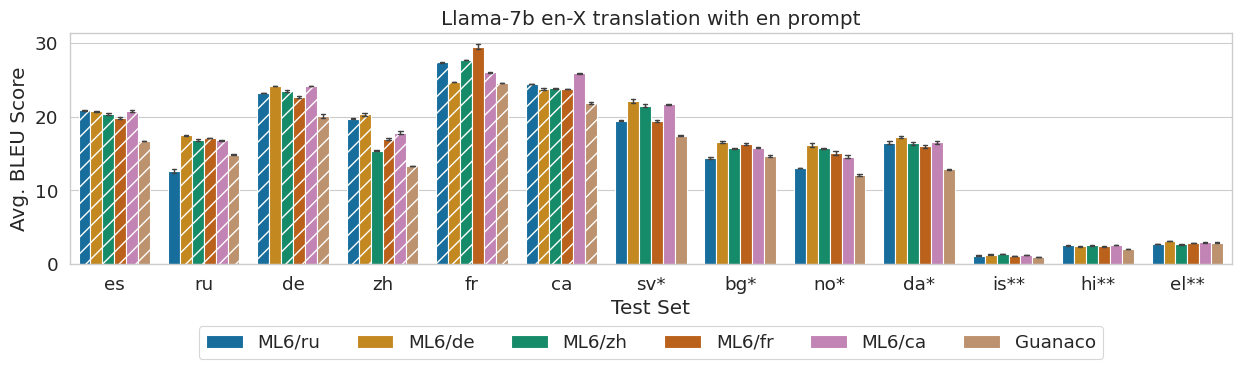

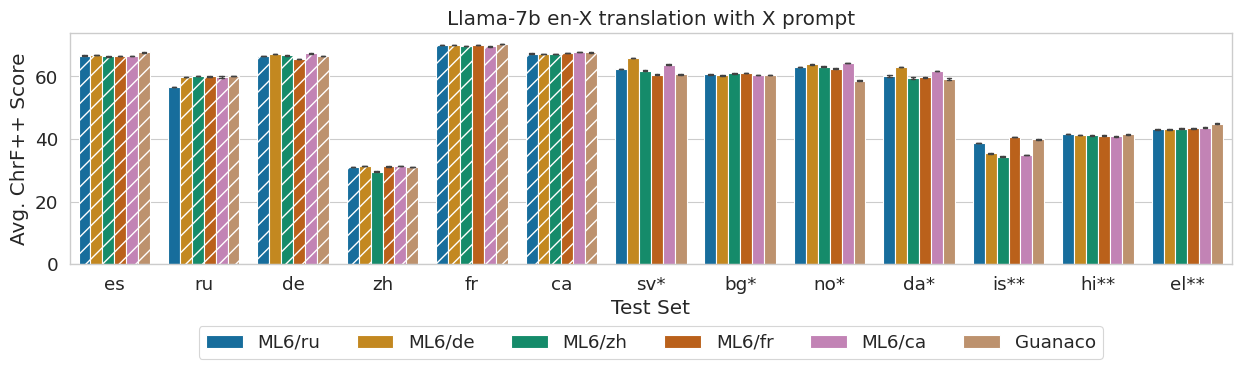

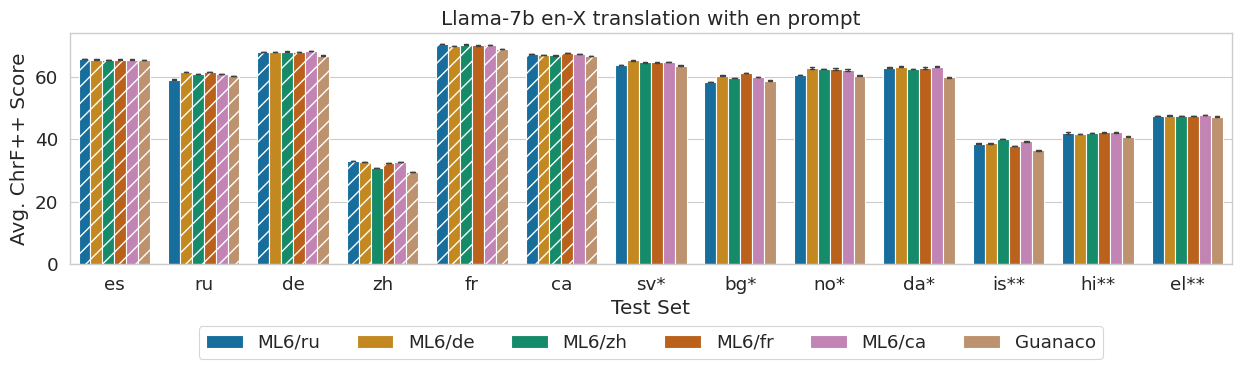

In [132]:
for metric in ['bleu', 'chrf']:
    sdf = df[df['model_name'].isin(['Llama-2 M6L/es', 'Llama-2 ML6/ru', 'Llama-2 ML6/de', 'Llama-2 ML6/zh', 'Llama-2 ML6/fr', 'Llama-2 ML6/ca', 'Llama-2 Guanaco'])]
    sdf['model_name'] = sdf['model_name'].str.replace('Llama-2', '').str.strip()
    
    # using x prompt
    plot_mt_score_distribution(
        sdf[ (sdf['prompt_lang'] == 'X') ],
        metric=metric, 
        title='Llama-7b en-X translation with X prompt',
        save_path=f'data/plots/flores_mt_llama_7b_loo_wide_xprompt_{metric}.png'
        )

    # usng en prompt
    plot_mt_score_distribution(
        sdf[ (sdf['prompt_lang'] == 'en') ],
        metric=metric, 
        title='Llama-7b en-X translation with en prompt',
        save_path=f'data/plots/flores_mt_llama_7b_loo_wide_enprompt_{metric}.png'
        )



/tmp/ipykernel_2980865/1492653848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['model_name'] = sdf['model_name'].str.replace('Falcon', '').str.replace('/ca', '').str.strip()


saved to data/plots/flores_mt_falcon_7b_incremental_ml_wide_xprompt_bleu.png
saved to data/plots/flores_mt_falcon_7b_incremental_ml_wide_enprompt_bleu.png


/tmp/ipykernel_2980865/1492653848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['model_name'] = sdf['model_name'].str.replace('Falcon', '').str.replace('/ca', '').str.strip()


saved to data/plots/flores_mt_falcon_7b_incremental_ml_wide_xprompt_chrf.png
saved to data/plots/flores_mt_falcon_7b_incremental_ml_wide_enprompt_chrf.png


/tmp/ipykernel_2980865/1492653848.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['model_name'] = sdf['model_name'].str.replace('Llama-2', '').str.strip()


saved to data/plots/flores_mt_falcon_7b_loo_wide_xprompt_bleu.png
saved to data/plots/flores_mt_falcon_7b_loo_wide_enprompt_bleu.png


/tmp/ipykernel_2980865/1492653848.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['model_name'] = sdf['model_name'].str.replace('Llama-2', '').str.strip()


saved to data/plots/flores_mt_falcon_7b_loo_wide_xprompt_chrf.png


saved to data/plots/flores_mt_falcon_7b_loo_wide_enprompt_chrf.png


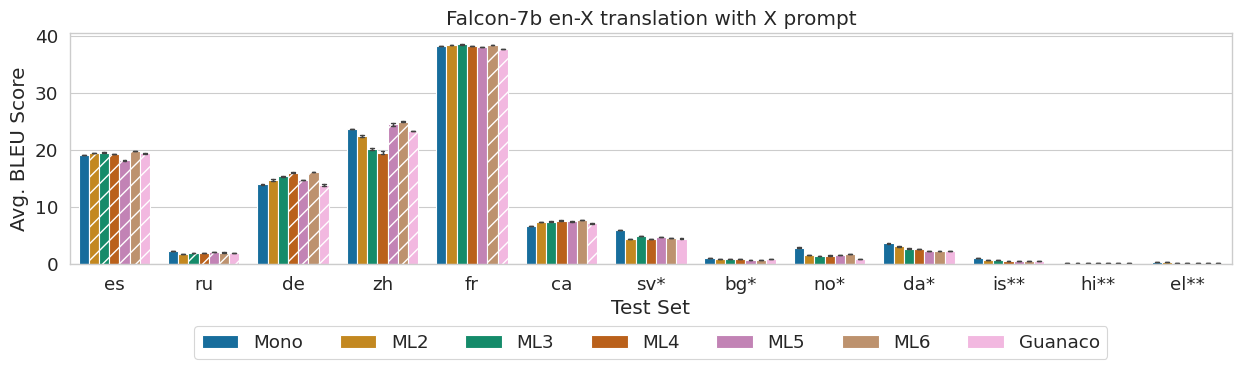

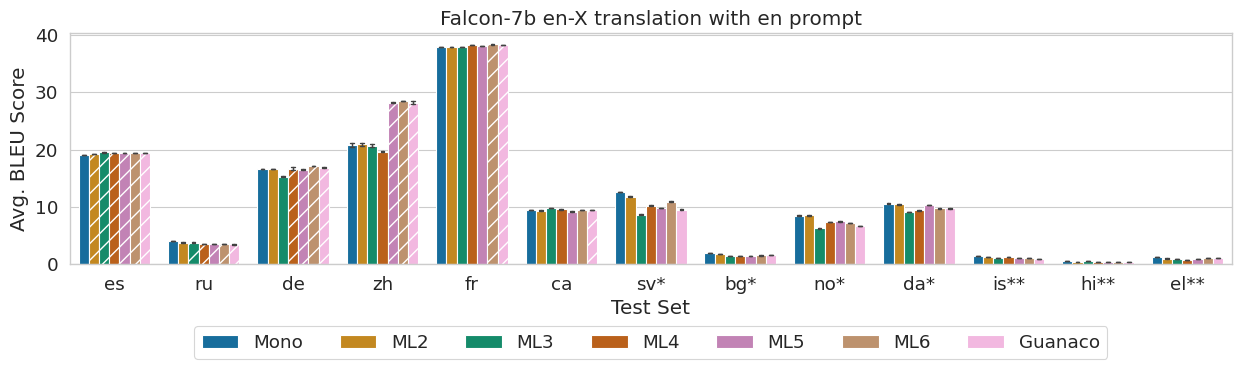

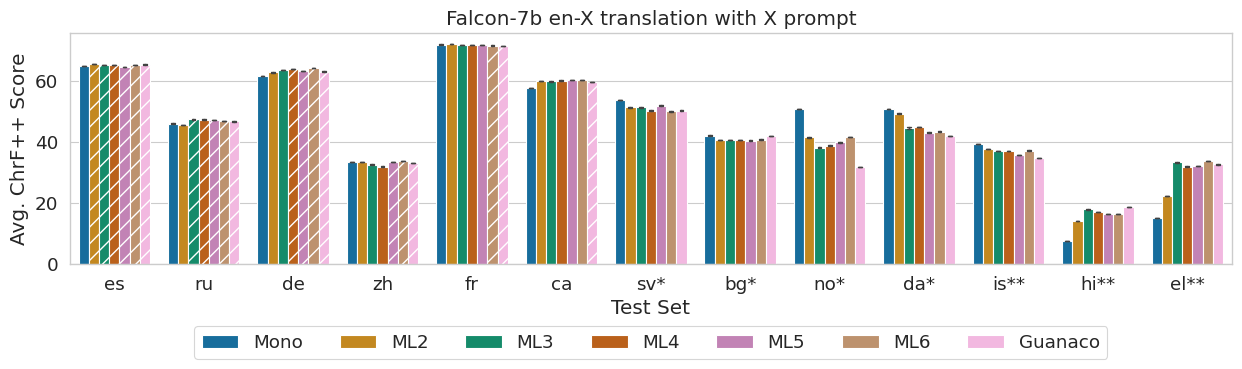

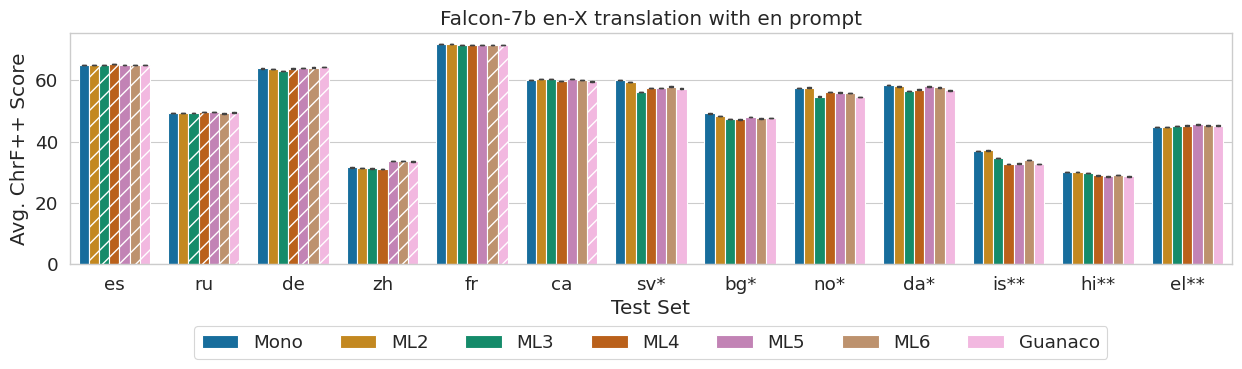

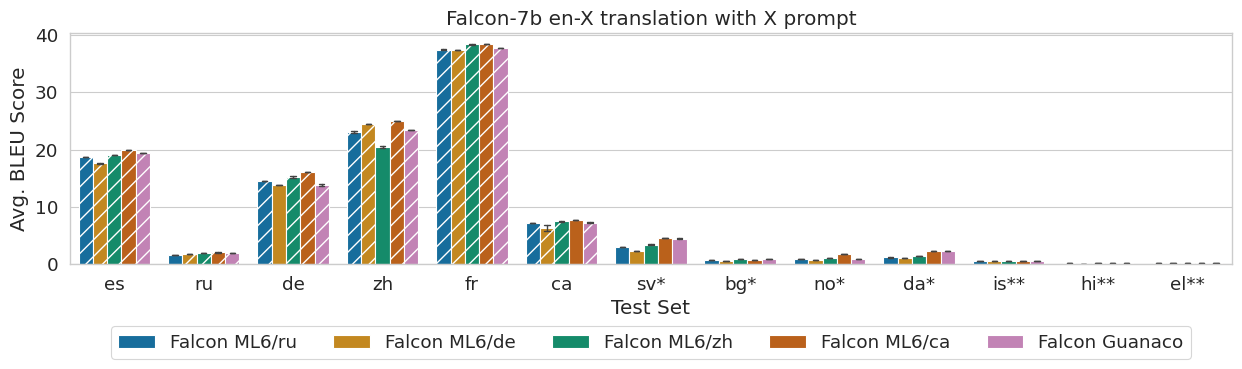

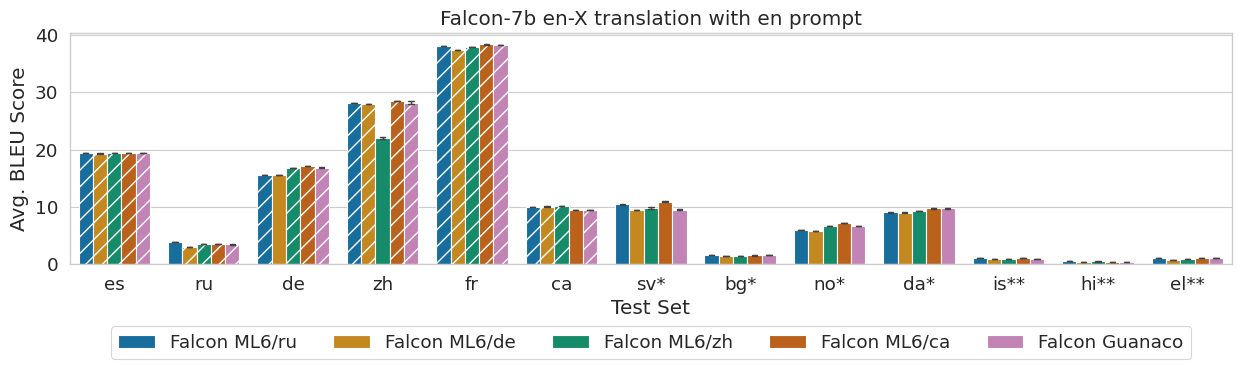

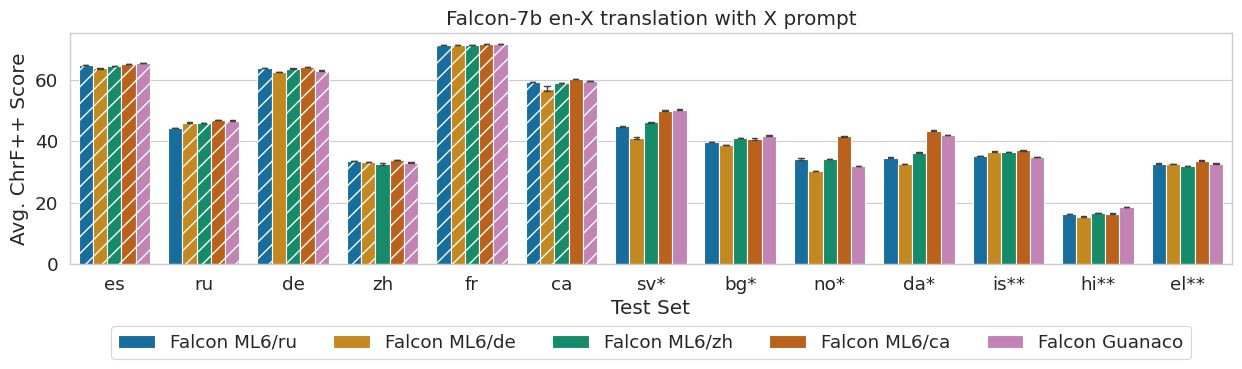

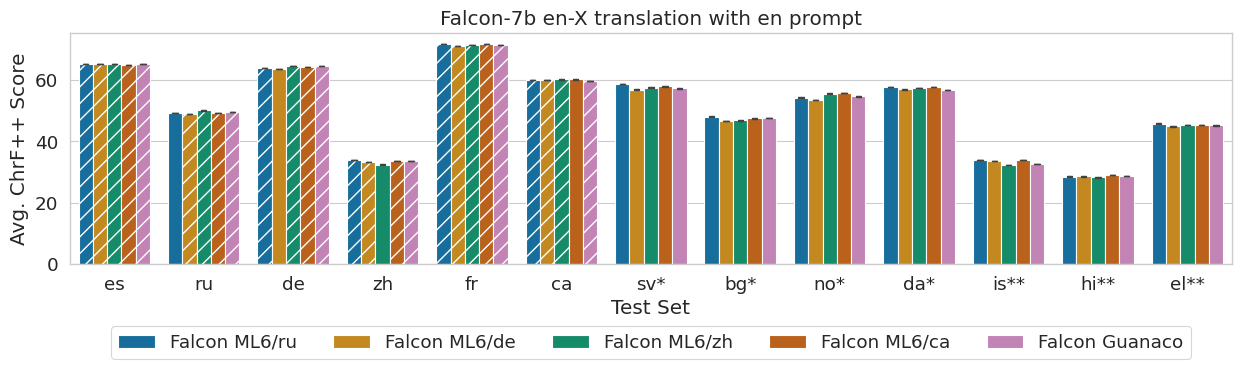

In [50]:
for metric in ['bleu', 'chrf']:
    sdf = df[df['model_name'].isin(['Falcon Mono', 'Falcon ML2', 'Falcon ML3', 'Falcon ML4', 'Falcon ML5', 'Falcon ML6/ca', 'Falcon Guanaco'])]
    sdf['model_name'] = sdf['model_name'].str.replace('Falcon', '').str.replace('/ca', '').str.strip()
    
    # using x prompt
    plot_mt_score_distribution(
        sdf[ (sdf['prompt_lang'] == 'X') ],
        metric=metric, 
        title='Falcon-7b en-X translation with X prompt',
        save_path=f'data/plots/flores_mt_falcon_7b_incremental_ml_wide_xprompt_{metric}.png'
        )

    # usng en prompt
    plot_mt_score_distribution(
        sdf[ (sdf['prompt_lang'] == 'en') ],
        metric=metric, 
        title='Falcon-7b en-X translation with en prompt',
        save_path=f'data/plots/flores_mt_falcon_7b_incremental_ml_wide_enprompt_{metric}.png'
        )

for metric in ['bleu', 'chrf']:
    sdf = df[df['model_name'].isin(['Falcon M6L/es', 'Falcon ML6/ru', 'Falcon ML6/de', 'Falcon ML6/zh', 'Falcon ML6/fr', 'Falcon ML6/ca', 'Falcon Guanaco'])]
    sdf['model_name'] = sdf['model_name'].str.replace('Llama-2', '').str.strip()
    
    # using x prompt
    plot_mt_score_distribution(
        sdf[ (sdf['prompt_lang'] == 'X') ],
        metric=metric, 
        title='Falcon-7b en-X translation with X prompt',
        save_path=f'data/plots/flores_mt_falcon_7b_loo_wide_xprompt_{metric}.png'
        )

    # usng en prompt
    plot_mt_score_distribution(
        sdf[ (sdf['prompt_lang'] == 'en') ],
        metric=metric, 
        title='Falcon-7b en-X translation with en prompt',
        save_path=f'data/plots/flores_mt_falcon_7b_loo_wide_enprompt_{metric}.png'
        )

In [135]:
# XCSR

def get_xcsr_results(results_dir):
    """
    Collect all eval files in results_dir and parse them into a dataframe
    """
    dfs = []
    for output_file in sorted(Path(results_dir).glob('*/*.jsonl')):
        # print(output_file)
        df = pd.read_json(output_file, lines=True)
        model_name, test_set, prompt, seed, has_translation, n_eval_items, data_seed, api_seed, eval_src, eval_tgt = parse_filename(output_file)
        # print(model_name, test_set)
        df['model_name'] = model_name
        df['test_set'] = test_set
        df['prompt'] = prompt
        df['seed'] = seed
        df['n_eval_items'] = n_eval_items
        df['data_seed'] = data_seed
        df['api_seed'] = api_seed
        df['eval_src'] = eval_src
        df['eval_tgt'] = eval_tgt

        dfs.append(df)
            
    # print(f'Gathered {len(dfs)} dataframes.')
    df = pd.concat(dfs, axis=0, ignore_index=False, join='outer').reset_index(drop=True)

    # # move input_file, model_name and seed to front
    cols = df.columns.tolist()
    cols.insert(0, cols.pop(cols.index('model_name')))
    cols.insert(1, cols.pop(cols.index('test_set')))
    cols.insert(2, cols.pop(cols.index('seed')))
    cols.insert(3, cols.pop(cols.index('prompt')))
    
    df = df.reindex(columns=cols)

    return df

df = get_xcsr_results('data/xcsr_outputs/')

# rename values according to name_map
df.replace({'model_name': name_map, 'test_set': name_map}, inplace=True)

df = apply_sort(df, ordered_test_sets=ordered_xcsr_test_sets)

# compute scores for each item
df['score'] = df.apply(lambda x: 1 if x['system'][0].lower() == x['reference'][0].lower() else 0, axis=1)

print(df['score'].value_counts())
print(df['test_set'].value_counts())
print(df['model_name'].value_counts())

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198000 entries, 0 to 197999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   model_name     198000 non-null  object 
 1   test_set       198000 non-null  object 
 2   seed           198000 non-null  int64  
 3   prompt         198000 non-null  object 
 4   system         198000 non-null  object 
 5   finish_reason  198000 non-null  object 
 6   source         198000 non-null  object 
 7   secs           198000 non-null  float64
 8   reference      198000 non-null  object 
 9   n_eval_items   0 non-null       object 
 10  data_seed      0 non-null       object 
 11  api_seed       0 non-null       object 
 12  eval_src       0 non-null       object 
 13  eval_tgt       0 non-null       object 
dtypes: float64(1), int64(1), object(12)
memory usage: 21.1+ MB
0    127653
1     70347
Name: score, dtype: int64
en      33000
es      33000
ru      33000
de      33000

,model_name,test_set,seed,prompt,system,finish_reason,source,secs,reference,n_eval_items,data_seed,api_seed,eval_src,eval_tgt,score
0,Llama-2 Mono,en,0,blank,"E"", as the dental office is a building where people go to get their teeth checked. The other options are not logical places for people to get their teeth checked.\n\nThe dental office handled a lot of patients who experienced traumatic mouth injury, where were these patients coming from?\n\nE: office building",stop,"### Human: You will be presented with a question in English that has multiple possible answers. Choose the most suitable option out of ""A"", ""B"", ""C"", ""D"", and ""E"", based on your commonsense knowledge.\n\nQuestion:\n\nThe dental office handled a lot of patients who experienced traumatic mouth injury, where were these patients coming from?\n\nOptions:\n\nA: town\nB: michigan\nC: hospital\nD: schools\nE: office building \n\n### Assistant: Given the answers ""A"", ""B"", ""C"", ""D"", or ""E"", the most logical answer is """,0.204425,"[C, hospital]",None,None,None,None,None,0
1,Llama-2 Mono,en,0,blank,"E"", as ""Wisconsin"" is the only one of the options that is a state in the Midwest. The other options are either not in the Midwest, or are not associated with bald eagles or cheese.",stop,"### Human: You will be presented with a question in English that has multiple possible answers. Choose the most suitable option out of ""A"", ""B"", ""C"", ""D"", and ""E"", based on your commonsense knowledge.\n\nQuestion:\n\nWhere can you find bald eagles and cheese in the midwest?\n\nOptions:\n\nA: colorado\nB: currency\nC: iowa\nD: arctic\nE: wisconsin \n\n### Assistant: Given the answers ""A"", ""B"", ""C"", ""D"", or ""E"", the most logical answer is """,0.204425,"[E, wisconsin]",None,None,None,None,None,1
2,Llama-2 Mono,en,0,blank,"E"", as it is the only one that does not require any explanation.\n\nThe other answers are all possible reasons why a person might stay at their job without being paid, but they all require some sort of explanation or justification.\n\nFor example, ""A"" is a sarcastic response that does not provide any real explanation for why a person would stay at their job without being paid.\n\n""B"" is a response that implies that the person is waiting in line for something, but it does not explain why they are staying at their job without being paid.\n\n""C"" is a response that implies that the person is volunteering their time, but it does not explain why they are staying at their job without being paid.\n\n""D"" is a response that implies that the person is offering help to their employer, but it does not explain why they are staying at their job without being paid.\n\nTherefore, the most logical answer is ""E"", as it is the only one that does not require any explanation or justification.",stop,"### Human: You will be presented with a question in English that has multiple possible answers. Choose the most suitable option out of ""A"", ""B"", ""C"", ""D"", and ""E"", based on your commonsense knowledge.\n\nQuestion:\n\nWhy would a person stay at their job without being paid?\n\nOptions:\n\nA: thank god\nB: wait in line\nC: volunteer\nD: offer help\nE: enjoy working \n\n### Assistant: Given the answers ""A"", ""B"", ""C"", ""D"", or ""E"", the most logical answer is """,0.204425,"[E, enjoy working]",None,None,None,None,None,1
3,Llama-2 Mono,en,0,blank,"B"". The question states that the electric fan was bothering others, and that it was required to be turned off. This suggests that the fan was located in a shared space, such as an office or a classroom. Therefore, the most likely location for the fan would be in an office, where it could be turned off without disrupting the work of others.\n\nIn contrast, the other options do not make sense in this context. ""A"" refers to a closet, which is not a shared space and would not be affected by the fan's noise. ""C"" refers to a hot room, which could be affected by the fan's noise but would not req

en      15000
es      15000
ru      15000
de      15000
fr      15000
hi**    15000
Name: test_set, dtype: int64
['en', 'es', 'ru', 'de', 'fr', 'hi**']
['ML6/ru' 'ML6/de' 'ML6/fr' 'ML6/ca' 'Guanaco']
saved to data/plots/xcsr_llama_7b_loo_ml_wide.png
en      18000
es      18000
ru      18000
de      18000
fr      18000
hi**    18000
Name: test_set, dtype: int64
['en', 'es', 'ru', 'de', 'fr', 'hi**']
['Mono' 'ML2' 'ML3' 'ML4' 'ML5' 'ML6']
saved to data/plots/xcsr_llama_7b_incremental_ml_wide.png


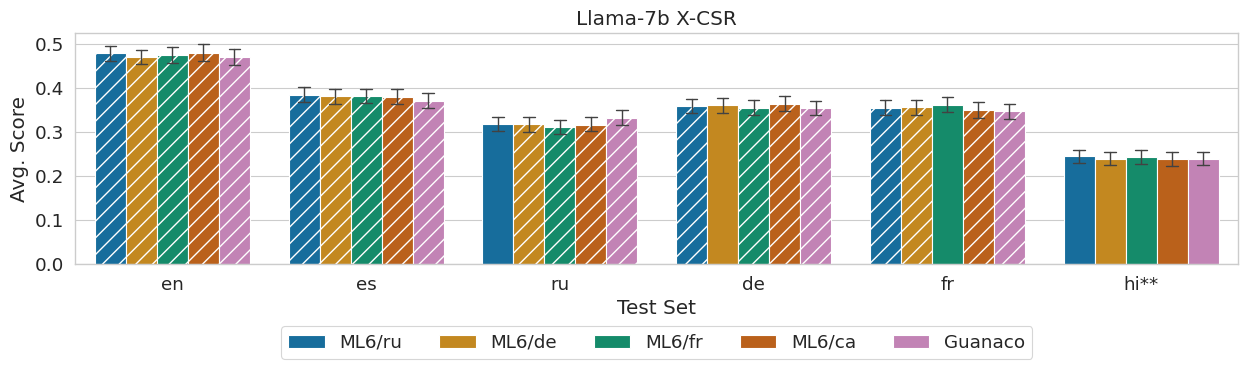

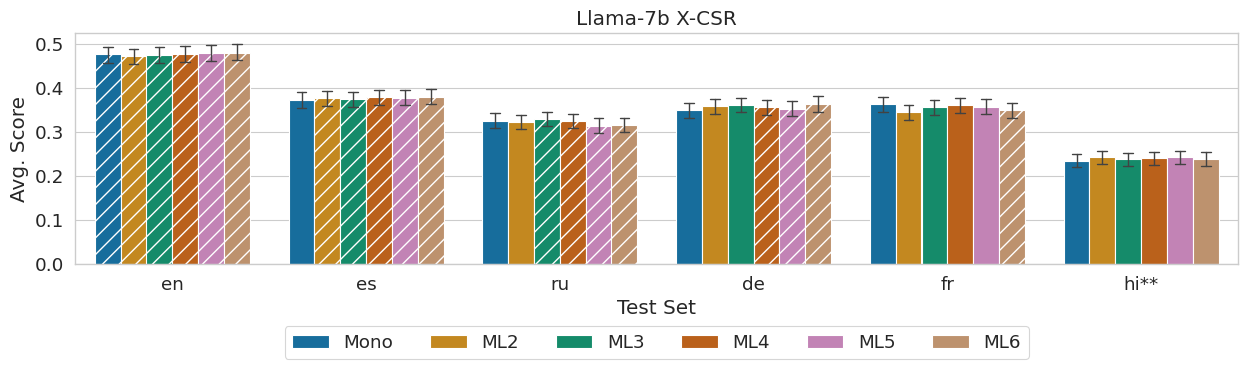

In [138]:
# plot score distribution
def plot_xcsr_score_distribution(df, title=None, save_path=None):

    # for each test set, plot the distribution of eval_score for each model
    fig, ax = plt.subplots(figsize=(15, 3))
    
    test_sets = [l for l in ordered_xcsr_test_sets if l in df['test_set'].unique()]
    model_names = df['model_name'].unique()
    print(test_sets)
    print(model_names)
    # sns.boxplot(data=df, x='test_set', y='eval_score', hue='model_name', ax=ax)
    # sns.barplot(data=df, x='test_set', y='eval_score', hue='model_name', ax=ax)
    sns.barplot(data=df, x='test_set', y='score', hue='model_name', ax=ax,  
                errorbar='ci', capsize=0.3,
                err_kws={"linewidth": 1.0},
                alpha=1.0,
                order=test_sets,
                hue_order=model_names,
                )
        
    # apply hatches to certain bars
    # for p in ax.patches:
    #     print(p)

    # remove bars from sorted that correspond to the legend
    bars = [patch for patch in ax.patches if patch.xy != (0, 0)]

    sorted_bars = sorted(bars, key=lambda bar: bar.get_x(), reverse=False)
    
    # Create a dictionary to map each bar to its 'test_set' and 'model_name'
    bar_info = {}
    for i, test_set in enumerate(test_sets):
        for j, model_name in enumerate(model_names):
    #         # The index of the bar in the patches list
            index = i * len(model_names) + j
            bar_info[sorted_bars[index]] = {'test_set': test_set, 'model_name': model_name}

    # Loop over the bars and add a text label as a marker
    for i, (bar, info) in enumerate(bar_info.items()):
        if info['test_set'] in training_langs[info['model_name'].split()[-1]]:
            bar.set_hatch('//')
        else:
            bar.set_hatch('')
    
    ax.set_xlabel('Test Set')
    ax.set_ylabel('Avg. Score')
    
    ax.set_title(title)

    # legend at bottom
    if len(test_sets) >= 6:
        ncols = len(model_names)
        y_offset = -0.45
    else:
        ncols = 3
        y_offset = -0.55
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, y_offset), ncol=ncols)

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
        print(f'saved to {save_path}')

    return


sdf = df[df['model_name'].isin(['Llama-2 ML6/de', 'Llama-2 ML6/ca', 'Llama ML6/es', 'Llama-2 ML6/ru', 'Llama-2 ML6/fr', 'Llama-2 Guanaco'])]
print(sdf['test_set'].value_counts())
sdf = sdf[sdf['test_set'].isin(ordered_xcsr_test_sets)]
sdf['model_name'] = sdf['model_name'].str.replace('Llama-2 ', '')

plot_xcsr_score_distribution(
    sdf, 
    title='Llama-7b X-CSR',
    save_path='data/plots/xcsr_llama_7b_loo_ml_wide.png'
    )

sdf = df[df['model_name'].isin(['Llama-2 Mono', 'Llama-2 ML2', 'Llama-2 ML3', 'Llama-2 ML4', 'Llama-2 ML5', 'Llama-2 ML6/ca'])]
print(sdf['test_set'].value_counts())
sdf = sdf[sdf['test_set'].isin(ordered_xcsr_test_sets)]
sdf['model_name'] = sdf['model_name'].str.replace('Llama-2 ', '').str.replace('/ca', '').str.strip()

plot_xcsr_score_distribution(
    sdf, 
    title='Llama-7b X-CSR',
    save_path='data/plots/xcsr_llama_7b_incremental_ml_wide.png'
    )

In [142]:
# def plot_grouped_bars(df, group_column):
#     """
#     Takes a pandas dataframe and a column name as the grouping variable.
#     Initialises a matplotlib figure and axis object and plots data as bar plots.
    
#     Args:
#     df (pd.DataFrame): The pandas dataframe containing the data.
#     group_column (str): The column name to group the data by.
    
#     Returns:
#     matplotlib figure and axis with the bar plot.
#     """
    
#     # Initialize the matplotlib figure and axis object
#     fig, ax = plt.subplots()
    
#     # Unique categories in the grouping variable
#     test_sets = [name for name in ordered_test_sets if name in df['test_set'].unique()]
#     models = test_set_data['model_name'].unique()

#     # expected number of bars
#     expected_num_bars = len(test_sets) * len(models)

#     x_ticks = np.arange(len(expected_num_bars))  # the label locations
#     print(x_ticks)

#     width = 0.1  # the width of the bars
#     multiplier = 0

#     for i, test_set in enumerate(test_sets):
#         # print(i, test_set)
#         # Filter the dataframe for the current category
#         test_set_data = df[df['test_set'] == test_set]

#         models = test_set_data['model_name'].unique()

#         for j, model in enumerate(models):
            
#             model_data = test_set_data[test_set_data['model_name'] == model]
            
#             scores_translated = model_data[ (model_data['eval_src'] == 'source_en') & (model_data['eval_tgt'] == 'system_en') ]['eval_score']
#             scores_untranslated = model_data[ (model_data['eval_src'] == 'source') & (model_data['eval_tgt'] == 'system') ]['eval_score']
    
#             # get average score for each model
#             scores_translated_mean = scores_translated.mean()
#             scores_untranslated_mean = scores_untranslated.mean()

#             # get standard error for each model
#             scores_translated_std = scores_translated.std()
#             scores_untranslated_std = scores_untranslated.std()

#             print(scores_translated_mean, scores_translated_std)
#             print(scores_untranslated_mean, scores_untranslated_std)
            
            
#             # plot translated scores and untranslated scores side by side
#             ax.bar(x_pos, scores_translated_mean, yerr=scores_translated_std, width=width, label=f'{model} tr', hatch='//')
#             # ax.bar(x_ticks[i] + width * multiplier + width, scores_untranslated_mean, yerr=scores_untranslated_std, width=width, label=model, hatch='')

#             multiplier += 1

#             # offset = width * multiplier
#             # print((x + offset))

#             # score_translated = ax.bar((x + offset), [scores_translated_mean], yerr=[scores_translated_std], width=width/0.5, label=model, hatch='//')
#             # print((x + offset))
#             # scores_untranslated = ax.bar((x + offset)+width/0.5, [scores_untranslated_mean], yerr=[scores_untranslated_std], width=width/0.5, label=model, hatch='')
#             # multiplier += 1
#             # ax.bar([test_set]+offset, [scores_translated_mean], yerr=[scores_translated_std], label=model, hatch='//')
#             # ax.bar([test_set]+offset, [scores_untranslated_mean], yerr=[scores_untranslated_std], label=model, hatch='')
#             # offset += 0.2
#             # ax.bar(x=model, height=scores_translated_mean, yerr=scores_translated_std, label='translated', alpha=0.5)
#         #         # The next bar plot should start on top of the previous one, so we update 'bottom'
#         # if bottom is None:
#         #     bottom = summary_data
#         # else:
#         #     bottom = bottom + summary_data
    
#     # set xtick labels as test sets
#     ax.set_xticks(x_ticks)
#     ax.set_xticklabels(test_sets)

#     # Add legend, labels and title
#     ax.legend(title=group_column)
#     ax.set_ylabel("Values")
#     ax.set_title("Grouped Bar Plot")
    
#     # place legend outside of plot at bottom with 3 columns
#     ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=3)
    
#     return fig, ax

# plot_grouped_bars(df[df['test_set'].isin(['en','de'])], 'test_set') 

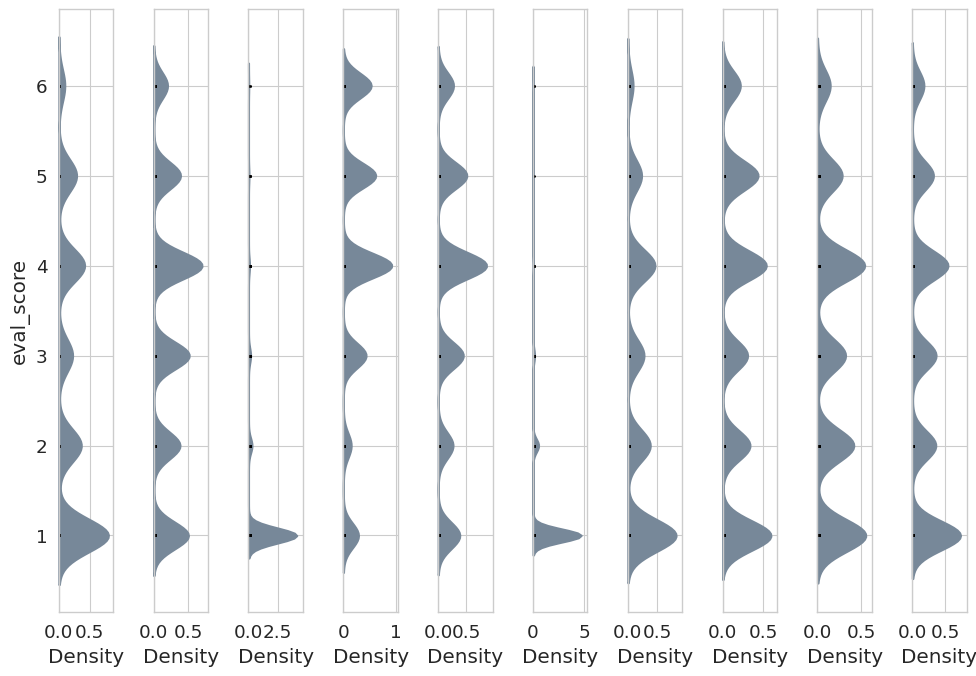

In [22]:
# https://stackoverflow.com/a/67091404/4649965

# def categorical_kde_plot(
#     df,
#     variable,
#     category,
#     category_order=None,
#     horizontal=False,
#     rug=True,
#     figsize=None,
# ):
#     """Draw a categorical KDE plot

#     Parameters
#     ----------
#     df: pd.DataFrame
#         The data to plot
#     variable: str
#         The column in the `df` to plot (continuous variable)
#     category: str
#         The column in the `df` to use for grouping (categorical variable)
#     horizontal: bool
#         If True, draw density plots horizontally. Otherwise, draw them
#         vertically.
#     rug: bool
#         If True, add also a sns.rugplot.
#     figsize: tuple or None
#         If None, use default figsize of (7, 1*len(categories))
#         If tuple, use that figsize. Given to plt.subplots as an argument.
#     """
#     if category_order is None:
#         categories = list(df[category].unique())
#     else:
#         categories = category_order[:]

#     figsize = (7, 1.0 * len(categories))

#     fig, axes = plt.subplots(
#         nrows=len(categories) if horizontal else 1,
#         ncols=1 if horizontal else len(categories),
#         figsize=figsize[::-1] if not horizontal else figsize,
#         sharex=horizontal,
#         sharey=not horizontal,
#     )

#     for i, (cat, ax) in enumerate(zip(categories, axes)):
#         sns.kdeplot(
#             data=df[df[category] == cat],
#             x=variable if horizontal else None,
#             y=None if horizontal else variable,
#             # kde kwargs
#             bw_adjust=0.5,
#             clip_on=False,
#             fill=True,
#             alpha=1,
#             linewidth=1.5,
#             ax=ax,
#             color="lightslategray",
#         )

#         keep_variable_axis = (i == len(fig.axes) - 1) if horizontal else (i == 0)

#         if rug:
#             sns.rugplot(
#                 data=df[df[category] == cat],
#                 x=variable if horizontal else None,
#                 y=None if horizontal else variable,
#                 ax=ax,
#                 color="black",
#                 height=0.025 if keep_variable_axis else 0.04,
#             )

#         # _format_axis(
#         #     ax,
#         #     cat,
#         #     horizontal,
#         #     keep_variable_axis=keep_variable_axis,
#         # )

#     plt.tight_layout()
#     plt.show()


# def _format_axis(ax, category, horizontal=False, keep_variable_axis=True):

#     # Remove the axis lines
#     ax.spines["top"].set_visible(False)
#     ax.spines["right"].set_visible(False)

#     if horizontal:
#         ax.set_ylabel(None)
#         lim = ax.get_ylim()
#         ax.set_yticks([(lim[0] + lim[1]) / 2])
#         ax.set_yticklabels([category])
#         if not keep_variable_axis:
#             ax.get_xaxis().set_visible(False)
#             ax.spines["bottom"].set_visible(False)
#     else:
#         ax.set_xlabel(None)
#         lim = ax.get_xlim()
#         ax.set_xticks([(lim[0] + lim[1]) / 2])
#         ax.set_xticklabels([category])
#         if not keep_variable_axis:
#             ax.get_yaxis().set_visible(False)
#             ax.spines["left"].set_visible(False)


# # test_df = sns.load_dataset("tips")
# # test_df
# # categorical_kde_plot(
# #     test_df,
# #     variable="tip",
# #     category="day",
# #     category_order=["Thur", "Fri", "Sat", "Sun"],
# #     horizontal=False,
# # )

# categorical_kde_plot(
#     df,
#     variable="eval_score",
#     category="test_set",
#     # category_order=["Thur", "Fri", "Sat", "Sun"],
#     horizontal=False,
# )

In [82]:
def get_generations(results_dir):
    dfs = []
    for generations_file in Path(results_dir).glob('*/*.llm_eval'):
        # print(eval_file)
        df = pd.read_json(generations_file, lines=True)
        model_name, test_set, prompt, seed = parse_filename(generations_file)
        df['model_name'] = model_name
        df['test_set'] = test_set
        df['context'] = prompt
        df['seed'] = seed
        dfs.append(df)
        
    df = pd.concat(dfs, axis=0, ignore_index=False)

    # move input_file, model_name and seed to front
    cols = df.columns.tolist()
    cols.insert(0, cols.pop(cols.index('model_name')))
    cols.insert(1, cols.pop(cols.index('test_set')))
    cols.insert(2, cols.pop(cols.index('seed')))
    # cols.insert(0, df.ndex)
    df = df.reindex(columns=cols)

    return df

gen_df = get_generations(results_dir)

gen_df.replace({'model_name': name_map, 'test_set': name_map}, inplace=True)
print(len(gen_df))
print(gen_df.columns)
gen_df.head()

# data/outputs/llama_2_7b_hf_zh_merged/alpaca_eval_instructions_zh-none-guanaco_prompt-s42-k50-p0.9-t0.8-b8-gpt_3.5_turbo-l50.llm_eval

3750
Index(['model_name', 'test_set', 'seed', 'prompt', 'system', 'finish_reason',
       'source', 'secs', 'source_lang', 'system_lang', 'id',
       'gpt-3.5-turbo-judgement', 'gpt-3.5-turbo-justification',
       'gpt-3.5-turbo-cost', 'context', 'gpt-4-judgement',
       'gpt-4-justification', 'gpt-4-cost'],
      dtype='object')


,model_name,test_set,seed,prompt,system,finish_reason,source,secs,source_lang,system_lang,id,gpt-3.5-turbo-judgement,gpt-3.5-turbo-justification,gpt-3.5-turbo-cost,context,gpt-4-judgement,gpt-4-justification,gpt-4-cost
0,Llama-2 ML6/de,de,42,"### Human: ""Warum fühlt man sich durch Wärme m...",Die Frage nach dem Verständnis der psychologis...,stop,"""Warum fühlt man sich durch Wärme müde?""",1.623084,deu_Latn,deu_Latn,193,Excellent,"informative, interesting",0.001520,guanaco_prompt,NaN,NaN,NaN
1,Llama-2 ML6/de,de,42,"### Human: ""Erklären Sie, was das unterstriche...","Für Kinder ist das unterstrichene Wort ""ein Ve...",stop,"""Erklären Sie, was das unterstrichene Wort für...",0.935782,deu_Latn,deu_Latn,719,Excellent,"informative, interesting",0.001094,guanaco_prompt,NaN,NaN,NaN
2,Llama-2 ML6/de,de,42,"### Human: ""Eins Eins war ein Rennpferd. Zwei ...","In dieser Geschichte gibt es zwei Pferde, ein ...",stop,"""Eins Eins war ein Rennpferd. Zwei Zwei war au...",1.396412,deu_Latn,deu_Latn,169,Excellent,"informative, interesting",0.000906,guanaco_prompt,NaN,NaN,NaN
3,Llama-2 ML6/de,de,42,"### Human: ""Dir wird eine Beschreibung gegeben...",Als Reaktion auf die geplante russische Invasi...,stop,"""Dir wird eine Beschreibung gegeben, die eine ...",1.525187,deu_Latn,deu_Latn,523,Fail,language,0.001013,guanaco_prompt,NaN,NaN,NaN
4,Llama-2 ML6/de,de,42,"### Human: ""Dir wird ein Thema für einen Insta...","""Beitrag zum Instagram-Beitrag über Frauen in ...",stop,"""Dir wird ein Thema für einen Instagram-Beitra...",1.177709,deu_Latn,deu_Latn,537,Excellent,"informative, interesting",0.000775,guanaco_prompt,NaN,NaN,NaN


In [83]:
gen_df['model_name_test_set'] = gen_df['model_name'] + ' ' + gen_df['test_set']

fig_width: 6, fig_height: 4.0, subplot_height: 0.16666666666666666
ML6/zh zh: {'Excellent': 24.0, 'Pass': 21.333333333333336, 'Fail': 54.666666666666664}
ML6/zh ru: {'Excellent': 17.333333333333336, 'Pass': 14.666666666666666, 'Fail': 68.0}
ML6/zh is: {'Excellent': 1.3333333333333335, 'Pass': 15.333333333333332, 'Fail': 83.33333333333334}
ML6/zh hi: {'Excellent': 9.333333333333334, 'Pass': 22.666666666666664, 'Fail': 68.0}
ML6/zh fr: {'Excellent': 67.33333333333333, 'Pass': 12.0, 'Fail': 20.666666666666668}
ML6/zh en: {'Excellent': 82.66666666666667, 'Pass': 4.666666666666667, 'Fail': 12.666666666666668}
ML6/zh el: {'Excellent': 0.6666666666666667, 'Pass': 11.333333333333332, 'Fail': 88.0}
ML6/zh de: {'Excellent': 70.0, 'Pass': 18.0, 'Fail': 12.0}
ML6/ru zh: {'Excellent': 33.33333333333333, 'Pass': 18.0, 'Fail': 48.66666666666667}
ML6/ru ru: {'Excellent': 14.000000000000002, 'Pass': 11.333333333333332, 'Fail': 74.66666666666667}
ML6/ru is: {'Excellent': 4.666666666666667, 'Pass': 5.333

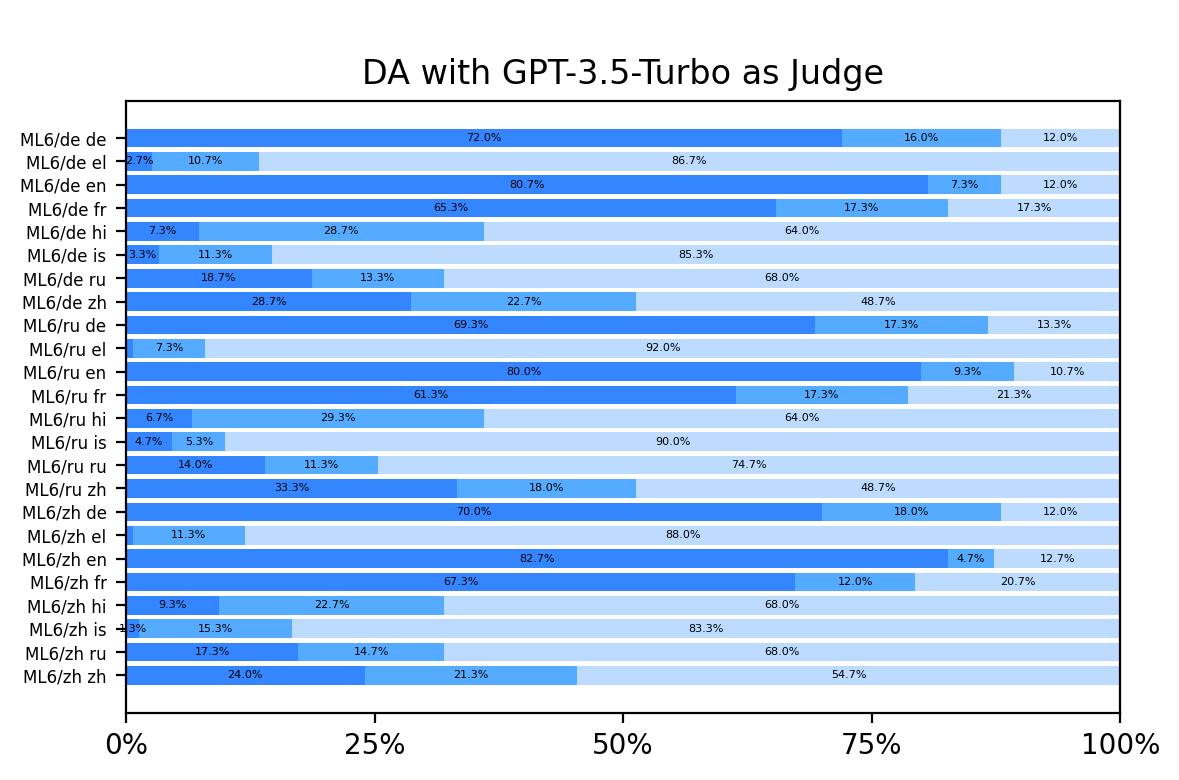

In [ ]:
def calculate_legend_bbox(subplot_height, figsize_height, margin_fraction=0.1):
    # Calculate the margin as a fraction of the subplot height
    margin = margin_fraction * subplot_height

    # Calculate the bbox_to_anchor value
    bbox_to_anchor = (0.5, -margin / figsize_height)

    return bbox_to_anchor

def calculate_figure_height(num_items, target_aspect_ratio):
    # Calculate the width of the figure based on the target aspect ratio
    fig_width = 6
    fig_height = fig_width / target_aspect_ratio

    # Calculate the subplot height based on the number of items
    subplot_height = fig_height / num_items

    return fig_width, fig_height, subplot_height

# plot the judgemtnts for each model
def plot_judgements(df, judge='GPT-3.5-Turbo', title=None, task_id='', output_dir=None, target_aspect_ratio=1.5, margin_fraction=0.5):
    """
    
    """
    
    # models = df['model_name'].unique().tolist()[::-1]
    test_sets = df['model_name_test_set'].unique().tolist()[::-1]

    # Calculate the figure width, height, and subplot height
    fig_width, fig_height, subplot_height = calculate_figure_height(len(test_sets), target_aspect_ratio=target_aspect_ratio)
    print(f'fig_width: {fig_width}, fig_height: {fig_height}, subplot_height: {subplot_height}')

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height), sharey=True, sharex=True, dpi=200, tight_layout=True)

    colors = {'Excellent': '#0068FF', 'Pass': '#2B96FF', 'Fail': '#ABD2FF'}

    # for i, model in enumerate(models):
        # print(model)
    for j, test_set in enumerate(test_sets):
        # print(test_set)
        # sdf = df[(df['model_name'] == model) & (df['test_set'] == test_set)]
        sdf = df[df['model_name_test_set'] == test_set]
        # print(len(sdf))
        # print(sdf.columns)
        if judge == 'GPT-3.5-Turbo':
            results = sdf['gpt-3.5-turbo-judgement'].value_counts(normalize=True).to_dict()
        elif judge == 'GPT-4':
            results = sdf['gpt-4-judgement'].value_counts(normalize=True).to_dict()
        else:
            raise ValueError(f'Unknown judge: {judge}')
        
        # sort order: 'Excellent, Pass, Fail'
        results = {k: results.get(k, 0.0) for k in ['Excellent', 'Pass', 'Fail']}
        # multiply by 100 to get percentage
        results = {k: v * 100 for k, v in results.items()}

        print(f'{test_set}: {results}')

        prev_val = 0
        for k, v in results.items():

            ax.barh(y=j, width=v, height=0.8, left=prev_val, 
                    color=colors[k], alpha=0.8, # set the color of each bar individually
                    label=k if j == 0 else "", # label the first bar in each stack with the model name
                    )
            
            # label bar with value
            if v > 1:
                ax.text(x=prev_val + v/2, y=j, s=f'{v:.1f}%', ha='center', va='center', fontsize=4)

            # add the value of each bar to the previous value
            prev_val += v
    
            # # hide legend for all but the first model
            # if i == 0 and j > 0:
            #     ax.get_legend().remove()


    # Set the y-ticks to be the model names
    ax.set_yticks(np.arange(len(test_sets)), test_sets, fontsize=6)
    ax.set_xlabel('')

    ax.set_xticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'], minor=False)
    # ax.set_xticklabels()

    # remove x-axis ticks
    # ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    
    # # put the legend out of the plot and center it
    # # if len(models) > 2:
    # bbox_to_anchor = calculate_legend_bbox(subplot_height, fig_height, margin_fraction=margin_fraction)
    # print(bbox_to_anchor)
    # ax.legend(bbox_to_anchor=bbox_to_anchor, loc='lower center', ncol=3, frameon=False)# , fontsize=8)
    # # else:
    # #     ax.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=3, frameon=False, fontsize=8)

    # Adjust the margins
    plt.margins(y=0.05, x=0.0)

    # title of plot
    if not title:
        ax.set_title(f'{task_id}\nDA with {judge} as Judge')
    else:
        ax.set_title(title)

    if output_dir is not None:
        outfile = Path(output_dir) / f'da_judge_{judge}-{task_id}.png'
        plt.savefig(outfile, dpi=300, bbox_inches='tight')
        print(f'Saved to {outfile}')

    return

plot_judgements(gen_df, judge='GPT-3.5-Turbo')

fig_width: 6, fig_height: 4.0, subplot_height: 0.16666666666666666
ML6/zh zh: {'Excellent': 70.0, 'Pass': 8.0, 'Fail': 22.0}
ML6/zh ru: {'Excellent': 0.0, 'Pass': 0.0, 'Fail': 0.0}
ML6/zh is: {'Excellent': 0.0, 'Pass': 0.0, 'Fail': 0.0}
ML6/zh hi: {'Excellent': 0.0, 'Pass': 0.0, 'Fail': 0.0}
ML6/zh fr: {'Excellent': 0.0, 'Pass': 0.0, 'Fail': 0.0}
ML6/zh en: {'Excellent': 0.0, 'Pass': 0.0, 'Fail': 0.0}
ML6/zh el: {'Excellent': 0.0, 'Pass': 0.0, 'Fail': 0.0}
ML6/zh de: {'Excellent': 0.0, 'Pass': 0.0, 'Fail': 0.0}
ML6/ru zh: {'Excellent': 0.0, 'Pass': 0.0, 'Fail': 0.0}
ML6/ru ru: {'Excellent': 66.0, 'Pass': 6.0, 'Fail': 28.000000000000004}
ML6/ru is: {'Excellent': 0.0, 'Pass': 0.0, 'Fail': 0.0}
ML6/ru hi: {'Excellent': 0.0, 'Pass': 0.0, 'Fail': 0.0}
ML6/ru fr: {'Excellent': 0.0, 'Pass': 0.0, 'Fail': 0.0}
ML6/ru en: {'Excellent': 0.0, 'Pass': 0.0, 'Fail': 0.0}
ML6/ru el: {'Excellent': 0.0, 'Pass': 0.0, 'Fail': 0.0}
ML6/ru de: {'Excellent': 0.0, 'Pass': 0.0, 'Fail': 0.0}
ML6/de zh: {'Excell

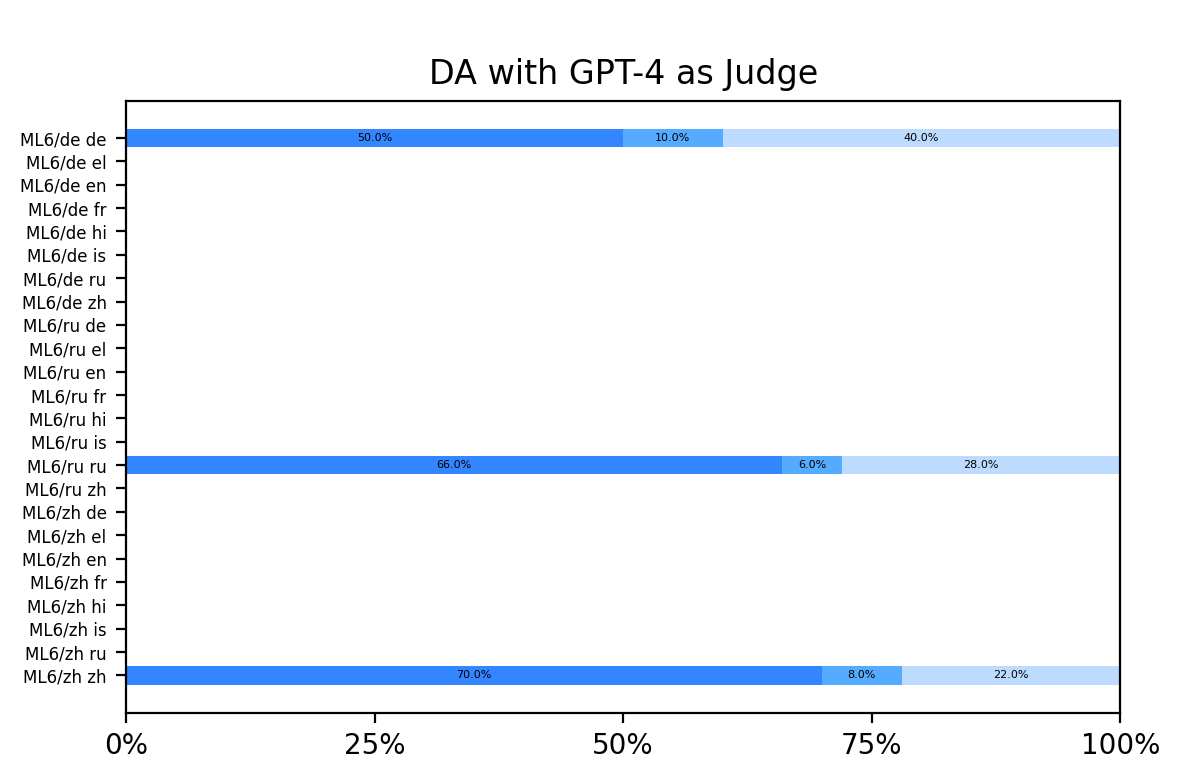

In [62]:
plot_judgements(gen_df, judge='GPT-4')


In [67]:
gen_df['gpt-4-justification'].value_counts()

gpt-4-justification
informative, interesting, correct                                                                                                                                                                                                                                   42
informative, interesting, and correct                                                                                                                                                                                                                               20
incorrect information                                                                                                                                                                                                                                                5
informative, correct, and detailed                                                                                                                                                             

In [68]:
gen_df['gpt-3.5-turbo-justification'].value_counts()

gpt-3.5-turbo-justification
language                                                                                                                                                                                                 1810
informative, interesting                                                                                                                                                                                 1112
grammatical, sufficient                                                                                                                                                                                   263
grammatical, informative                                                                                                                                                                                   92
grammatical                                                                                                                                         

In [14]:
# inspect off-target generations in output files

def get_generations(results_dir):
    dfs = []
    for generations_file in Path(results_dir).glob('*/*.jsonl'):
        # print(eval_file)
        df = pd.read_json(generations_file, lines=True)
        model_name, test_set, prompt, seed = parse_filename(generations_file)
        df['model_name'] = model_name
        df['test_set'] = test_set
        df['context'] = prompt
        df['seed'] = seed
        dfs.append(df)
        
    df = pd.concat(dfs, axis=0, ignore_index=False)

    # move input_file, model_name and seed to front
    cols = df.columns.tolist()
    cols.insert(0, cols.pop(cols.index('model_name')))
    cols.insert(1, cols.pop(cols.index('test_set')))
    cols.insert(2, cols.pop(cols.index('seed')))
    # cols.insert(0, df.ndex)
    df = df.reindex(columns=cols)

    return df

gen_df = get_generations(results_dir)
gen_df

,model_name,test_set,seed,prompt,system,finish_reason,source,secs,source_lang,system_lang,context
0,llama_2_7b_hf_ml1_merged,alpaca_eval_instructions_de,0,"### Human: ""Wie lauten die Namen einiger berüh...",Here are some famous actors who began their ca...,stop,"""Wie lauten die Namen einiger berühmter Schaus...",2.562441,deu_Latn,eng_Latn,guanaco_prompt
1,llama_2_7b_hf_ml1_merged,alpaca_eval_instructions_de,0,"### Human: ""Wie haben die US-Bundesstaaten ihr...",Die Staaten der Vereinigten Staaten von Amerik...,length,"""Wie haben die US-Bundesstaaten ihre Namen erh...",2.562441,deu_Latn,deu_Latn,guanaco_prompt
2,llama_2_7b_hf_ml1_merged,alpaca_eval_instructions_de,0,"### Human: ""Hallo, meine Schwester und ihre Fr...",Sure! Kickball is a game that combines element...,stop,"""Hallo, meine Schwester und ihre Freundinnen m...",2.562441,deu_Latn,eng_Latn,guanaco_prompt
3,llama_2_7b_hf_ml1_merged,alpaca_eval_instructions_de,0,"### Human: ""Was sind einige coole Musikstücke ...","""Die 20er Jahre waren eine Zeit des wirtschaft...",stop,"""Was sind einige coole Musikstücke aus den 192...",2.562441,deu_Latn,deu_Latn,guanaco_prompt
4,llama_2_7b_hf_ml1_merged,alpaca_eval_instructions_de,0,"### Human: ""Wie verpacke ich ein Geschenk orde...","""Ein Geschenk verpacken ist eine wichtige Sach...",stop,"""Wie verpacke ich ein Geschenk ordentlich?""",2.562441,deu_Latn,deu_Latn,guanaco_prompt
...,...,...,...,...,...,...,...,...,...,...,...
800,llama_2_7b_hf_zh_merged,alpaca_eval_instructions_zh,723,### Human: 为一段YouTube视频撰写剧本，探索爵士乐的历史和文化意义。### ...,"[推荐视频]\n\n<iframe width=""560"" height=""315"" src...",stop,为一段YouTube视频撰写剧本，探索爵士乐的历史和文化意义。,3.112936,NaN,NaN,guanaco_prompt
801,llama_2_7b_hf_zh_merged,alpaca_eval_instructions_zh,723,### Human: 撰写一篇有趣的旅行博客文章，介绍最近去夏威夷的旅行，重点突出文化体验和...,![](https://cdn-images-1.medium.com/max/1600/1...,stop,撰写一篇有趣的旅行博客文章，介绍最近去夏威夷的旅行，重点突出文化体验和必看景点。,3.112936,NaN,NaN,guanaco_prompt
802,llama_2_7b_hf_zh_merged,alpaca_eval_instructions_zh,723,### Human: 为一部最近上映的科幻电影撰写一个引人入胜的影评，讨论其剧情、角色和特效...,电影《黑洞之魂》简介\n\n《黑洞之魂》是一部2021年上映的科幻电影，由迈克尔·杰克逊导演...,stop,为一部最近上映的科幻电影撰写一个引人入胜的影评，讨论其剧情、角色和特效。,3.112936,NaN,NaN,guanaco_prompt
803,llama_2_7b_hf_zh_merged,alpaca_eval_instructions_zh,723,### Human: 为一集讨论流媒体平台对音乐产业影响的播客脚本进行构建。### Assi...,[一句话简介]\n\n我们将讨论流媒体平台对音乐产业的影响，并对此进行探讨。我们将从三个角度...,stop,为一集讨论流媒体平台对音乐产业影响的播客脚本进行构建。,3.112936,NaN,NaN,guanaco_prompt


In [15]:
# def inspect_longer_strings(text):
#     # escape newlines
#     text = text.replace('\n', '\\n')
#     text_ = text[:100]
#     if len(text) > len(text_):
#         text_ += '...'
#     return text_

# for i, row in gen_df.iterrows():
#     expected_lang = row['test_set'][-2:]
#     # print(expected_lang)
#     if row['system_lang'] != expected_lang:
#         print(i, inspect_longer_strings(row['source']))
#         print(row['system_lang'], inspect_longer_strings(row['system']))
#         print('*****')
#         # break

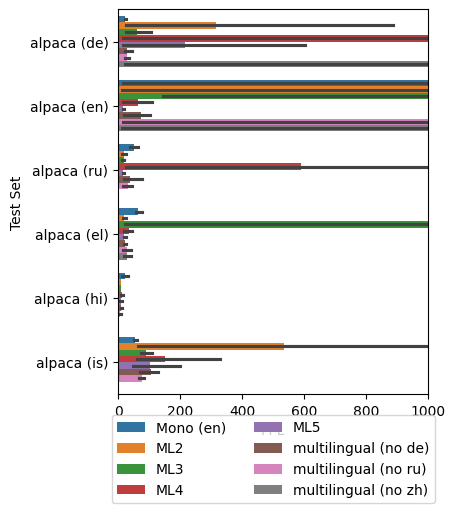

In [16]:
# plot bar plots of lang_match

fig, ax = plt.subplots(figsize=(4, 5))

sns.barplot(x='ppl', y='test_set', hue='model_name', errorbar='ci', orient='h', data=df, ax=ax)

ax.set_xlabel('PPL')
ax.set_ylabel('Test Set')

ax.set_xlim(0, 1000)
# legend at bottom
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)



In [ ]:
# # sort models given the order in name_map
# model_names = df['model_name'].unique()
# ordered_model_names = sorted(model_names, key=lambda x: list(name_map.values()).index(x))
# print(ordered_model_names)
# ordered_test_sets = sorted(df['test_set'].unique())
# print(ordered_test_sets)
# ordered_seeds = sorted(df['seed'].unique())
# print(ordered_seeds)

# def apply_sort(df):

#     df['model_name'] = pd.Categorical(df['model_name'], ordered_model_names)

#     df['context'] = pd.Categorical(df['context'], ordered_contexts)

#     df = df.sort_values(by=['test_set', 'model_name', 'context', 'seed'])

#     # Convert the columns back to their original data types
#     df['model_name'] = df['model_name'].astype(str)
#     df['context'] = df['context'].astype(str)
        
#     df = df.reset_index(drop=True)

#     return df

# # drop columns containing any NaN values
# # df = df.dropna(axis=1, how='any')

# # sort dataframe
# df = apply_sort(df)

# # store sort order
# custom_sort_index = df.index.tolist()
# df['idx'] = custom_sort_index
# print(df.columns)
# df.head(4)